# Introduction
The goal of our analysis is to accuraty predict if a given zipcode has an electric charging station, and the amount of charging stations in a zipcode.
!['Afraid of cholesterol?'](https://img.freepik.com/free-photo/electric-car-ev-charger-city-background_336913-200.jpg?w=1380)
This is important because the United States Government is starting to take climate change and limiting CO2 production more seriously on both a state and federal level. We can see states such as California starting bills to ban production of gas vechicals by 2030 and talks of enacting a federal tax based on the miles driven with compustion engine cars. While these are positive changes with the attempt to preserve the environment careful planning is nessicary to reach a carbon-neutral goal. This is because of the short supply of rare Earth metals needed to create the batteries. The availability of electric cars has become more abundant as more manufacturers transition their production for these feature needs. 

The benefit of this project is to identify zipcodes with no or low amounts of electric charging stations, this was we can promote insentives for these communities to become more electric vehicle friendly. Some States are already offering tax incentives to electric vehicle owners which is only complemented by the potential savings of ownership.

Works Referenced

Ben Preston and Jeff S. Bartlett. “Automakers Are Adding Electric Vehicles to 
Lineups.” Consumer Reports, https://www.consumerreports.org/hybrids-evs/why-electric-cars-may-soon-flood-the-us-market-a9006292675/. 

Doll, Scooter. “Here's Every Electric Vehicle That Currently Qualifies for the US Federal Tax Credit.” Electrek, 15 Apr. 2022, https://electrek.co/2022/04/15/which-electric-vehicles-still-qualify-for-us-federal-tax-credit/. 

Dow, Jameson. “CA DEMS Endorse Plan to Push California Gas Car Ban to 2030.” Electrek, 2 Sept. 2021, https://electrek.co/2021/09/01/ca-dems-endorse-plan-to-push-california-gas-car-ban-to-2030/#:~:text=Last%20September%2C%20California%20Governor%20Gavin,the%20same%202035%20end%20date. 

Hausfather, Zeke. “Factcheck: How Electric Vehicles Help to Tackle Climate Change.” Carbon Brief, 8 Oct. 2021, https://www.carbonbrief.org/factcheck-how-electric-vehicles-help-to-tackle-climate-change. 

Ian Duncan, Joe Fox. “Two States Tax Some Drivers by the Mile. Many More Want to Give It a Try.” The Washington Post, WP Company, 12 Mar. 2021, https://www.washingtonpost.com/transportation/interactive/2021/electric-mileage-tax/. 

IEA (2022), Electric cars fend off supply challenges to more than double global sales, IEA, Paris https://www.iea.org/commentaries/electric-cars-fend-off-supply-challenges-to-more-than-double-global-sales

Koetsier, John. “US Needs 10x More Rare Earth Metals to Hit Biden's Electric 
Vehicle Goals.” Forbes, Forbes Magazine, 1 Oct. 2021, https://www.forbes.com/sites/johnkoetsier/2021/09/29/us-needs-10x-more-rare-earth-metals-to-hit-bidens-electric-vehicle-goals/?sh=1d31353c3e41.

LaReau, Jamie L. “Study Compares Electric Vehicle Charge Costs vs. Gas - and Results Were Surprising.” Detroit Free Press, Detroit Free Press, 26 Oct. 2021, https://www.freep.com/story/money/cars/2021/10/21/electric-vehicle-charging-cost-vs-gas/6110815001/. 

Marta.moses. “Benefits of Electric Cars on the Environment.” EDF, EDF, https://www.edfenergy.com/for-home/energywise/electric-cars-and-environment. 

Prakash, Nives Dolsak and Aseem. “The Lack of EV Charging Stations Could Limit EV Growth.” Forbes, Forbes Magazine, 10 Dec. 2021, https://www.forbes.com/sites/prakashdolsak/2021/05/05/the-lack-of-ev-charging-stations-could-limit-ev-growth/?sh=4c8fde646a13. 


# Getting Started

## Importing Modules

In [ ]:
#Modules for reading data, EDA, data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

import re

# For Imputation
from sklearn.impute import KNNImputer

from sklearn.feature_selection import VarianceThreshold

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


# more advanced ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# permutation testing
from sklearn.inspection import permutation_importance

In [ ]:
!pip install pulp &> /dev/null # for partial dependence plots!
!pip install pycebox &> /dev/null
from pycebox.ice import ice, ice_plot

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading Project Dataset
We have been provided a dataset from the Alternative Fuels Data Center named chargingStations.csv

In [ ]:
charging_url = '/content/drive/Shareddrives/OPIM 5512 Projects/Project 2/data/chargingStations.csv'

df_charging = pd.read_csv(charging_url)

df_charging.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (6,10,14,15,16,20,31,33,34,35,36,43,46,49,52,53,57,58,59,60,61,62,63) have mixed types.Specify dtype option on import or set low_memory=False.



,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,NaN
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,...,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN,NaN
4,CNG,Clean Energy - Texas Department of Transportation,7721A Washington St,"I-10, Washington Ave exit, 1.5 blocks to the s...",Houston,TX,77007,NaN,866-809-4869,E,...,NaN,NaN,NaN,NaN,Q,3000 3600,MD,NaN,NaN,NaN


Cleaning Charging Station Data Set

Fixing Zipcode Column (ZIP)
This column is vital as the goal of the asignment is to predict the amount of/if there are any electric charging stations per zipcode. Additionally, this is the column we will be merging external datasets to.

In [ ]:
#Removing an imporperly coded zipcode
df_charging.drop(df_charging[df_charging.ZIP == 'L2G3X'].index, inplace=True)

# Converting zip to string as it will be easier to add leading zeroes
df_charging['ZIP'] = df_charging['ZIP'].astype(str)

# zip code is a 5 digit code so adding leading zeroes to the zip with less than 5 digits
df_charging['ZIP'] = df_charging['ZIP'].apply(lambda x: x.zfill(5))

df_charging['ZIP'].nunique()

11537

First step will be agrigating by zip code. To do this we will recode the Fuel type code varible where 'Elec' is equal to 1 and all others equal to 0. Once this is done we will group by zipcode

In [ ]:
#Examing Fuel Type Code
print(df_charging['Fuel Type Code'].unique())
recode = {'Fuel Type Code' : {'CNG' : 0, 'E85' : 0 , 'ELEC' : 1, 'LNG' : 0, 
                              'LPG' : 0, 'BD': 0 , 'HY' :0}
          }
df_charging = df_charging.replace(recode)
df_charging['Fuel Type Code'].sum() #recoded so only elec has a value

['CNG' 'E85' 'ELEC' 'LNG' 'LPG' 'BD' 'HY']


47859

Before aggregating we will remove unnecessary columns. The scope of this project is identifying electric charging stations in America, therefore any column not related to electric fuel types will be emliminated.

Large missing values can be removed, street addresses and city names can also be removed. The country column will only be the us therefore it can be removed. Infact it will be easier to create out df dataframe by placing them in their own.


In [ ]:
df_charging.info()
cols = ['Fuel Type Code', 'State','City' , 'ZIP', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network', 'EV Network Web', 'EV Connector Types', 'EV Pricing', 'EV On-Site Renewable Source', 'Latitude', 'Longitude']

df = df_charging.loc[:, cols]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 57551 entries, 0 to 57551
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    57551 non-null  int64  
 1   Station Name                      57551 non-null  object 
 2   Street Address                    57549 non-null  object 
 3   Intersection Directions           4879 non-null   object 
 4   City                              57551 non-null  object 
 5   State                             57551 non-null  object 
 6   ZIP                               57551 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     53104 non-null  object 
 9   Status Code                       57551 non-null  object 
 10  Expected Date                     392 non-null    object 
 11  Groups With Access Code           57551 non-null  object 
 12  Acce

In [ ]:
print(df.head())
print(df.shape)
print(df.info())

   Fuel Type Code State        City    ZIP  EV Level1 EVSE Num  \
0               0    AL  Montgomery  36107                 NaN   
1               0    GA     Atlanta  30303                 NaN   
2               0    GA     Atlanta  30324                 NaN   
3               0    GA     Atlanta  30336                 NaN   
4               0    TX     Houston  77007                 NaN   

   EV Level2 EVSE Num  EV DC Fast Count EV Other Info EV Network  \
0                 NaN               NaN           NaN        NaN   
1                 NaN               NaN           NaN        NaN   
2                 NaN               NaN           NaN        NaN   
3                 NaN               NaN           NaN        NaN   
4                 NaN               NaN           NaN        NaN   

  EV Network Web EV Connector Types EV Pricing EV On-Site Renewable Source  \
0            NaN                NaN        NaN                         NaN   
1            NaN                NaN   

In [ ]:
#EV On-Site Renewable Source
df['EV On-Site Renewable Source'].unique()
recode = {'EV On-Site Renewable Source' : { 'nan' : 0, 'SOLAR' : 1 , 'WIND' : 1, 'HYDRO' : 1, 'WASTEWATER' : 1, 'NONE' :0 }}
df = df.replace(recode)
df['EV On-Site Renewable Source'] = df['EV On-Site Renewable Source'].fillna(0)
df['EV On-Site Renewable Source'].isna().sum()

0

#### Fixing Pricing column

In [ ]:
df['EV Pricing'].value_counts()

Free                                                                                  9178
FREE                                                                                   966
$0.28 per kWh; $0.26 per minute above 60 kW and $0.13 per minute at or below 60 kW     862
Level 2: $0.49 per kWh                                                                 785
Level 2: $0.59 per kWh                                                                 300
                                                                                      ... 
$0.55-$15.00/Hr Variable Parking Fee                                                     1
$0.00-$1.50/Hr Variable Parking Fee, $0.15/kWh Energy Fee                                1
$0.35/Hr Parking Fee                                                                     1
$0.00-$0.75/Hr Variable Parking Fee                                                      1
$0.00-$5.00/Hr Variable Parking Fee, $0.00-$0.40/kWh Variable Energy Fee                 1

In [ ]:
# fixing all the errors while performing regex
df.loc[(df['EV Pricing'].str.contains('5:30')) & (df['EV Pricing'].notna()),'EV Pricing']='1'
df.loc[(df['EV Pricing'].isin(['Free','FREE','free'])) & (df['EV Pricing'].notna()),'EV Pricing']='0.0'
df.loc[(df['EV Pricing'].str.contains('1/2')) & (df['EV Pricing'].notna()),'EV Pricing']='0.0'
df.loc[(df['EV Pricing'].str.contains('0-30')) & (df['EV Pricing'].notna()),'EV Pricing']='0.30'

In [ ]:
# extracting the price we need using regex
evs = df.loc[df['EV Pricing'].notna(),'EV Pricing']
ls = [] # creating empty list to store the extracted values
for i in evs.values:
  k=re.findall('\d.\d+',i)
  if len(k)==0:
    ls.append(float(0.0))
  elif (len(k)>=1) and k[0]=='0.00':
    ls.append(float(k[1]))
  else:
    ls.append(float(k[0]))

In [ ]:
# assigned the extracted prices to the column
df.loc[df['EV Pricing'].notna(),'EV Pricing'] = ls

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



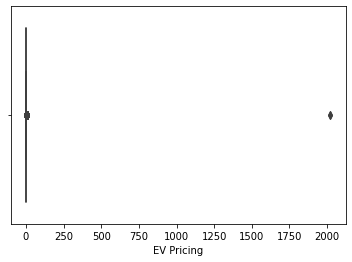

In [ ]:
# checking for outliers using a boxplot
sns.boxplot(df['EV Pricing'])

In [ ]:
# fixing the outliers
df.loc[df['EV Pricing'] > 100, 'EV Pricing'] = 0.0

In [ ]:
# converting the column to float as all the values are prices
df['EV Pricing'] = df['EV Pricing'].astype('float64')

In [ ]:
# renaming as this column is now clean
df.rename(columns={'EV Pricing':'EV pricing clean'},inplace=True)

In [ ]:
# Here NaN values means there are no electric stations in those zip codes so, we are just giving a zero price for those zip codes
df.loc[(df['Fuel Type Code']!='ELEC') & (df['EV pricing clean'].isna()), ['EV pricing clean']] = 0.0

In [ ]:
df['EV Network Web'].unique() #These are webistes lets drop them
df.drop('EV Network Web', axis = 1, inplace = True)

#EV Connector Types
df['EV Connector Types'].unique() 

#we can make a varible summing the amount of connecter types in each zipcode same code as EV pricing 
#expect whent this is aggregated we will have a some of the amount of charging stations per zip

df['EV Connector Types'] = df['EV Connector Types'].fillna('nan')

tmp = pd.get_dummies(df['EV Connector Types'])
tmp['nan'].replace(to_replace = 1, value = 0, inplace = True)

tmp['EV Connector Types'] = tmp.sum(axis = 1) #Sums all columns of dummies
tmp['EV Connector Types'].describe()

df['EV Connector Types'] = tmp['EV Connector Types']

print(df['EV Connector Types'].describe(), df['EV Connector Types'].unique())

#EV Other Info
df['EV Other Info'].isna().sum() #This is almost entirly missing well drop it
df.drop('EV Other Info', axis = 1, inplace = True)



count    57551.000000
mean         0.831245
std          0.374538
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: EV Connector Types, dtype: float64 [0 1]


In [ ]:
#EV Network 
df['EV Network'].unique()
 # Lets just clean this up, itll be interesting to see if as different catigorical varibles, they can help based on location

recode = {'EV Network' : { 'nan' : 'Non-Networked', 'Tesla Destination' : 'Tesla' }}
df = df.replace(recode)
df['EV Network'].fillna('Non-Networked',inplace = True)


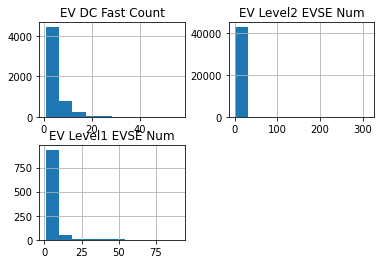

In [ ]:
#EV DC Fast Count 'EV Level2 EVSE Num', 'EV Level1 EVSE Num' histagrams since they were always numeric varibles
df.loc[:, ['EV DC Fast Count', 'EV Level2 EVSE Num', 'EV Level1 EVSE Num']].hist()
plt.show()

### Aggregating
Aggregating df so that it can be merged to the zipcode dataset lets drop lat and long since they will be added from the zipcode dataset and then group by zipcode

In [ ]:
df.drop(['Longitude', 'Latitude'], axis = 1, inplace = True)
df.columns
cols = ['Fuel Type Code', 'ZIP', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num',
       'EV DC Fast Count', 'EV Connector Types', 'EV pricing clean',
       'EV On-Site Renewable Source']
df = df.groupby(['ZIP']).agg({'EV Network': 'sum', 'State' : 'first','City' :'first' ,'Fuel Type Code': 'sum',  'EV Level1 EVSE Num': 'mean', 'EV Level2 EVSE Num': 'mean',
       'EV DC Fast Count': 'mean', 'EV Connector Types': 'count', 'EV pricing clean': 'mean',
       'EV On-Site Renewable Source' : 'mean'}).reset_index()

In [ ]:
display(df.head())
df['Fuel Type Code'].describe() # We know have our target varible

,ZIP,EV Network,State,City,Fuel Type Code,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Connector Types,EV pricing clean,EV On-Site Renewable Source
0,00745,Greenlots,PR,Rio Grande,1,NaN,6.0,NaN,1,0.0,0.0
1,00920,ChargePoint Network,PR,San Juan,1,NaN,1.0,NaN,1,0.0,0.0
2,00926,Greenlots,PR,San Juan,1,NaN,2.0,NaN,1,0.0,0.0
3,00965,Non-Networked,FL,Guaynabo,1,1.0,NaN,NaN,1,0.0,0.0
4,00969,ChargePoint NetworkGreenlots,PR,Guaynabo,2,NaN,2.0,NaN,2,0.0,0.0


count    11537.000000
mean         4.148305
std          9.269389
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        366.000000
Name: Fuel Type Code, dtype: float64

Zip Codes 

https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data

In [ ]:
url_zip  = 'https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data'

df_zip = pd.read_csv(url_zip)

df_zip.head()

df_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33144 entries, 0 to 33143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZIP     33144 non-null  int64  
 1   LAT     33144 non-null  float64
 2   LNG     33144 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 776.9 KB


In [ ]:
# Converting zip to string as it will be easier to add leading zeroes
df_zip['ZIP'] = df_zip['ZIP'].astype(str)

# zip code is a 5 digit code so adding leading zeroes to the zip with less than 5 digits
df_zip['ZIP'] = df_zip['ZIP'].apply(lambda x: x.zfill(5))
df_zip.head()


,ZIP,LAT,LNG
0,00601,18.180555,-66.749961
1,00602,18.361945,-67.175597
2,00603,18.455183,-67.119887
3,00606,18.158345,-66.932911
4,00610,18.295366,-67.125135


Merging DF and df_zip to make a dataset with all Zipcodes

In [ ]:
print(df_zip.nunique())

df = df.merge(df_zip, how = 'outer', on = 'ZIP')

df.shape #So there are some extra ZIP codes aprox 2300

df.head()

ZIP    33144
LAT    33116
LNG    33128
dtype: int64


,ZIP,EV Network,State,City,Fuel Type Code,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Connector Types,EV pricing clean,EV On-Site Renewable Source,LAT,LNG
0,00745,Greenlots,PR,Rio Grande,1.0,NaN,6.0,NaN,1.0,0.0,0.0,18.352216,-65.817387
1,00920,ChargePoint Network,PR,San Juan,1.0,NaN,1.0,NaN,1.0,0.0,0.0,18.414292,-66.088042
2,00926,Greenlots,PR,San Juan,1.0,NaN,2.0,NaN,1.0,0.0,0.0,18.345400,-66.051545
3,00965,Non-Networked,FL,Guaynabo,1.0,1.0,NaN,NaN,1.0,0.0,0.0,18.433757,-66.114752
4,00969,ChargePoint NetworkGreenlots,PR,Guaynabo,2.0,NaN,2.0,NaN,2.0,0.0,0.0,18.368062,-66.108062


## External Data Sets

### Incomes Dataset

Bilal Ahmad:
This is the income data by zipcodes. After cleaning, we are left with 12 columns and 58,354 rows. Here's an overview of the columns we are working with for this dataset.

* Column 1 ZIP: Zipcodes
* Column 2 ZipCodeType: Standard, PO BOX, Unique
* Column 3 LocationType: Type of location
* Column 4 Xaxis: x-axis
* Column 5 Yaxis: y-axis
* Column 6 Zaxis: z-axis
* Column 7 LocationText: City and state
* Column 8 Location: Abreviated regions
* Column 9 Decommissioned: True or False
* Column 10 TaxReturnsFiled: # of tax returns filed
* Column 11 EstimatedPopulation: # people in the region
* Column 12 TotalWages: sum of the wages in the region



In [ ]:
income_path = '/content/drive/Shareddrives/OPIM 5512 Projects/Project 2/data/incomes.csv'

df_incomes = pd.read_csv(income_path)
df_incomes.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.



(81831, 20)

Keeping this for now think we can get rid of more rows

In [ ]:
#dropping pre-existing/useless columns
#df_incomes = df_incomes.drop(columns=['Lat', 'Long', "State", "City", "Country", "Notes", "RecordNumber", "WorldRegion"])

#renaming the zip column for ease of merging
#df_incomes = df_incomes.rename(columns={"Zipcode": "ZIP"})

In [ ]:
#dropping pre-existing/useless columns
df_incomes = df_incomes.drop(columns=['Lat', 'Long', "State", "City", "Country", "Notes", "RecordNumber", "WorldRegion", "LocationType", "Xaxis", "Yaxis", "Zaxis", "LocationText", "Location", 'EstimatedPopulation' ])


In [ ]:
#dropping rows with no income value
df_incomes = df_incomes[df_incomes['TotalWages'].notna()]

#renaming the zip column for ease of merging
df_incomes = df_incomes.rename(columns={"Zipcode": "ZIP"})

df_incomes.shape


(58354, 5)

In [ ]:

print(df_incomes.head())

df_incomes.drop_duplicates(keep = 'first', inplace = True)

print(df_incomes.head())
print(df_incomes.shape)


      ZIP ZipCodeType  Decommisioned  TaxReturnsFiled    TotalWages
112  7093    STANDARD          False          26571.0  1.071976e+09
113  7093    STANDARD          False          26571.0  1.071976e+09
114  7675    STANDARD          False          13245.0  1.089095e+09
115  7675    STANDARD          False          13245.0  1.089095e+09
116  7675    STANDARD          False          13245.0  1.089095e+09
      ZIP ZipCodeType  Decommisioned  TaxReturnsFiled    TotalWages
112  7093    STANDARD          False          26571.0  1.071976e+09
114  7675    STANDARD          False          13245.0  1.089095e+09
118  7677    STANDARD          False           2945.0  3.254370e+08
121  7885    STANDARD          False           5273.0  2.408280e+08
122  7981    STANDARD          False           4585.0  2.920968e+08
(28844, 5)


In [ ]:
df_incomes.info()

df_incomes['ZIP'] = df_incomes['ZIP'].astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28844 entries, 112 to 80093
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ZIP              28844 non-null  int64  
 1   ZipCodeType      28844 non-null  object 
 2   Decommisioned    28844 non-null  bool   
 3   TaxReturnsFiled  28844 non-null  float64
 4   TotalWages       28844 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 1.1+ MB


### Zillow Dataset

Marc DeLuca: Using Zillows Housing Data website I found a data source that shows Zillows "Zillow Home Value Index (ZHVI)", which Zillow defines as a "typical home value", broken up by zipcode which will allow it to be merged to the charging stations dataset. (https://www.zillow.com/research/data/).

*   Column 1 RegionID: Unquie Identifer
*   Column 2 SizeRank: Compariative Size of Zip Code
*   Column 3 RegionName: ZipCode
*   Column 4 RegionType: Defining Type of Region Name (In all columns are Zip)
*   Column 5 StateName: State Abbrviation
*   Column 6 State: State Abbrviation
*   Column 7 City: City zipcode is located in
*   Column 8 Metro: Metro Area zipcode is located in
*   Column 9 CountyName: County zipcode is located in
*   Column 10 - Column 275: Timeseries of ZHVI from 1/31/2000 - 2/28/2022

In [ ]:
path_zillow = '/content/drive/Shareddrives/OPIM 5512 Projects/Project 2/data/zillowhousing.csv'

df_zillow = pd.read_csv(path_zillow)
df_zillow.shape # Extremely large and not all of these columns are needed

(30501, 275)

Cleaning the Zillow Data

In [ ]:
# Removing inital variables

#RegionID is not the zipcode, it is a seprate unquie identifer that will not be needed.

tmp = df_zillow['State'] == df_zillow['StateName']
print(tmp.unique()) # This means that all of the varibles are the same in these two columns

print(df_zillow['RegionType'].unique()) # Only one unquie Value this is unneeded
df_zillow.drop(labels = ['RegionID', 'RegionType','StateName'], axis = 1, inplace = True)

print("The Dataset now has the shape ", df_zillow.shape) #Three column reducation

[ True]
['Zip']
The Dataset now has the shape  (30501, 272)


Cleaning the timeseries:
Since Each time series is stored as a row instead of as its own dataset, the quickest way to consider missing values would be to transopse into columns and front/backfill

In [ ]:
tmp_zillow = df_zillow.iloc[:, 6:]

tmp_zillow = tmp_zillow.transpose() # Each zipcode is now its own row

print(tmp_zillow.isna().sum().sum()) #There are 1742258 missing values in timeseries

tmp_zillow.backfill(inplace =True)

print(tmp_zillow.isna().sum().sum()) # now there are no missing values in the timeseries and the trend is likely kept instead of filling based on an average

tmp_zillow = tmp_zillow.transpose()

tmp_dtypes = tmp_zillow.dtypes

tmp_dtypes.unique() # all correct datatype

1742258
0


array([dtype('float64')], dtype=object)

This data goes back long before electric cars, and car charging stations making most of these columns useless in this state, instead we will caluclate the average apperication of each zip code and keep the most recent zillow price column.

In [ ]:
col_len = len(tmp_zillow.columns)
tmp_zillow['sum_diff'] = tmp_zillow.diff(axis = 1).sum(axis = 1)
tmp_zillow['average_appreciation'] = (tmp_zillow['sum_diff']/col_len)
tmp_zillow['Appreciation_Rate'] = ((tmp_zillow['average_appreciation'] * 12)/tmp_zillow['2022-02-28'])*100

In [ ]:
print(tmp_zillow.iloc[:,-4:].columns)
cols_keep = ['2022-02-28', 'Appreciation_Rate' ] #columns to keep


Index(['2022-02-28', 'sum_diff', 'average_appreciation', 'Appreciation_Rate'], dtype='object')


Missing Values and Data types outside of timeseries

In [ ]:
cols = tmp_zillow.iloc[:,:-3].columns
df_zillow.drop(labels = cols, axis = 1, inplace = True)

df_zillow.head()
df_zillow.isna().sum() # only the metro column has missing values, since the other data will work to indentify the geogrophy this will be droped

df_zillow.drop(labels = 'Metro', axis = 1, inplace = True)

#df_zillow.info() # There are no missing values, however zipcode while numeric is a catigorical varible
df_zillow['RegionName'] = df_zillow['RegionName'].apply(str)
#df_zillow.info() # Now there are no missing values and the all data types are correct

Merging tmp & df zillow
Scince no rows were ever deleted, we can simiply concatnate the dataframes back together on the columns axis.

In [ ]:
df_z = pd.concat([df_zillow, tmp_zillow[cols_keep]], axis = 1)
df_z.shape

(30501, 7)

In [ ]:
df_z.head() #after after review we do not need state, city, or county name
df_z.drop(labels = ['City', 'CountyName'], axis =1, inplace = True)
df_z = df_z.rename(columns = {'RegionName' : 'ZipCode', '2022-02-28' : 'ZHVI'})
df_z.head()

,SizeRank,ZipCode,State,ZHVI,Appreciation_Rate
0,0,10025,NY,1787599.0,1.644707
1,1,60657,IL,734445.0,2.141731
2,2,10023,NY,2796234.0,2.192977
3,3,77494,TX,457220.0,2.295422
4,4,60614,IL,973540.0,2.192563


### Populations Dataset

Peeyush Kalidindi: This dataset gives us population in each zip code from year 2010 to 2016. The dataset can be found here: https://data.world/lukewhyte/us-population-by-zip-code-2010-2016

*   Column 1 zip_code: Zip Codes in the US
*   Column 2 y_2016: Population in 2016
*   Column 3 y_2015: Population in 2015
*   Column 4 y_2014: Population in 2014
*   Column 5 y_2013: Population in 2013
*   Column 6 y_2012: Population in 2012
*   Column 7 y_2011: Population in 2011
*   Column 8 y_2010: Population in 2010
*   Column 9 aggregate: Sum of the populations from 2010 to 2016

In [ ]:
path_pop = '/content/drive/Shareddrives/OPIM 5512 Projects/Project 2/data/pop-by-zip-code.csv'
df_pop = pd.read_csv(path_pop)

df_pop.info()

df_pop['zip_code'] = df_pop['zip_code'].astype(str) #Zipcode is easier to handel as a string

print(df_pop.head()) #Converting to string elmitanted the leading zeros

df_pop['zip_code'] = df_pop['zip_code'].apply(lambda x: x.zfill(5)) #Used this before to pad 0s

print(df_pop.head())
display(df_pop.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   zip_code   33120 non-null  int64
 1   y-2016     33120 non-null  int64
 2   y-2015     33120 non-null  int64
 3   y-2014     33120 non-null  int64
 4   y-2013     33120 non-null  int64
 5   y-2012     33120 non-null  int64
 6   y-2011     33120 non-null  int64
 7   y-2010     33120 non-null  int64
 8   aggregate  33120 non-null  int64
dtypes: int64(9)
memory usage: 2.3 MB
  zip_code  y-2016  y-2015  y-2014  y-2013  y-2012  y-2011  y-2010  aggregate
0      601   17800   17982   18088   18450   18544   18533   18570     127967
1      602   39716   40260   40859   41302   41640   41930   41520     287227
2      603   51565   52408   53162   53683   54540   54475   54689     374522
3      606    6320    6331    6415    6591    6593    6386    6615      45251
4      610   27976   28328   28805   28963   2

,y-2016,y-2015,y-2014,y-2013,y-2012,y-2011,y-2010,aggregate
count,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000
mean,9724.409300,9664.375151,9593.274607,9516.959994,9445.567693,9369.842512,9434.269233,66748.698490
std,14358.657599,14237.949376,14090.093299,13939.177211,13807.690410,13669.672456,13753.939334,97804.279384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,718.000000,718.750000,717.000000,721.000000,720.750000,716.000000,734.000000,5036.750000
50%,2807.500000,2808.000000,2805.500000,2801.500000,2786.000000,2792.000000,2805.500000,19636.500000
75%,13177.750000,13139.250000,13066.000000,13000.000000,12952.000000,12838.000000,12943.000000,91210.250000
max,115104.000000,114982.000000,115013.000000,114734.000000,115538.000000,114941.000000,113916.000000,797117.000000


This shows that some zipcodes have had no population, while it is logical to conclude that they are incorrect, it is a posibility if there are no perminate residents. For this reason they will not be imputated or deleted yet.

Well reduce this Dataset to 4 columns, Zipcode, population in 2016, aggregated sum and population growth rate

In [ ]:
cols = ['y-2016', 'y-2015', 'y-2014', 'y-2013', 'y-2012', 'y-2011', 'y-2010']
tmp_pop = df_pop.loc[:, cols]

tmp_pop = tmp_pop[tmp_pop.columns[::-1]]
col_len = len(tmp_pop.columns)
tmp_pop['sum_diff'] = tmp_pop.diff(axis = 1).sum(axis = 1)
tmp_pop['ave growth'] = (tmp_pop['sum_diff']/col_len)


tmp_pop['Growth Rate'] = ((tmp_pop['ave growth'] )/tmp_pop['y-2016'])*100

display(tmp_pop.head())

display(tmp_pop.describe())

,y-2010,y-2011,y-2012,y-2013,y-2014,y-2015,y-2016,sum_diff,ave growth,Growth Rate
0,18570,18533,18544,18450,18088,17982,17800,-770.0,-110.000000,-0.617978
1,41520,41930,41640,41302,40859,40260,39716,-1804.0,-257.714286,-0.648893
2,54689,54475,54540,53683,53162,52408,51565,-3124.0,-446.285714,-0.865482
3,6615,6386,6593,6591,6415,6331,6320,-295.0,-42.142857,-0.666817
4,29016,29111,29141,28963,28805,28328,27976,-1040.0,-148.571429,-0.531067


,y-2010,y-2011,y-2012,y-2013,y-2014,y-2015,y-2016,sum_diff,ave growth,Growth Rate
count,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,3.298000e+04
mean,9434.269233,9369.842512,9445.567693,9516.959994,9593.274607,9664.375151,9724.409300,290.140066,41.448581,-inf
std,13753.939334,13669.672456,13807.690410,13939.177211,14090.093299,14237.949376,14358.657599,1143.009679,163.287097,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18555.000000,-2650.714286,-inf
25%,734.000000,716.000000,720.750000,721.000000,717.000000,718.750000,718.000000,-105.000000,-15.000000,-8.992464e-01
50%,2805.500000,2792.000000,2786.000000,2801.500000,2805.500000,2808.000000,2807.500000,14.000000,2.000000,9.522487e-02
75%,12943.000000,12838.000000,12952.000000,13000.000000,13066.000000,13139.250000,13177.750000,263.000000,37.571429,8.867488e-01
max,113916.000000,114941.000000,115538.000000,114734.000000,115013.000000,114982.000000,115104.000000,35915.000000,5130.714286,1.428571e+01


In [ ]:
df_pop['Average Growth Rate'] = tmp_pop['Growth Rate']
display(df_pop.head())
cols_to_keep = ['zip_code', 'y-2016', 'aggregate' , 'Average Growth Rate']

df_population = df_pop.loc[:, cols_to_keep]
display(df_population.head())

,zip_code,y-2016,y-2015,y-2014,y-2013,y-2012,y-2011,y-2010,aggregate,Average Growth Rate
0,00601,17800,17982,18088,18450,18544,18533,18570,127967,-0.617978
1,00602,39716,40260,40859,41302,41640,41930,41520,287227,-0.648893
2,00603,51565,52408,53162,53683,54540,54475,54689,374522,-0.865482
3,00606,6320,6331,6415,6591,6593,6386,6615,45251,-0.666817
4,00610,27976,28328,28805,28963,29141,29111,29016,201340,-0.531067


,zip_code,y-2016,aggregate,Average Growth Rate
0,00601,17800,127967,-0.617978
1,00602,39716,287227,-0.648893
2,00603,51565,374522,-0.865482
3,00606,6320,45251,-0.666817
4,00610,27976,201340,-0.531067


Now we need to clean the dataset

### Poverty Dataset

Tushar Kothari 
https://data.census.gov/cedsci/table?q=United%20States&t=Poverty&g=0100000US%248600000&tid=ACSST5Y2020.S1701

This dataset is from the US Census Bureau and has 368 columns breaking down estimated population poverty by zipcode, the margin of error for those estimates, and ethnic/age/education/and other sociological breakdowns of the poverty demergraphic.

For this project we only care about the estimated poverty population and the Zip code therefore the columns being kept for this dataset are:


*   Geographic Area Name : Zipcode
*   Estimate!!Total!!Population for whom poverty status is determined : an estimate of the amount of people living in poverty per geographic area



In [ ]:
poverty_path = '/content/drive/Shareddrives/OPIM 5512 Projects/Project 2/data/ACSST5Y2020.S1701_data_with_overlays_2022-04-21T192301.csv'
df_pov= pd.read_csv(poverty_path)

In [ ]:
display(df_pov.shape)
display(df_pov.columns)

(33121, 368)

Index(['id', 'Geographic Area Name',
       'Estimate!!Total!!Population for whom poverty status is determined',
       'Margin of Error!!Total!!Population for whom poverty status is determined',
       'Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years',
       'Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years',
       'Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!Under 5 years',
       'Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!Under 5 years',
       'Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!5 to 17 years',
       'Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!5 to 17 years',
       ...
       'Estimate!!Percent below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!75 years and over',
  

In [ ]:
df_poverty = df_pov.iloc[:, 1:3]
display(df_poverty.info())
display(df_poverty.head()) #The vipcodes have a string in front that must be removed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Data columns (total 2 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Geographic Area Name                                               33121 non-null  object
 1   Estimate!!Total!!Population for whom poverty status is determined  33121 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 517.6+ KB


None

,Geographic Area Name,Estimate!!Total!!Population for whom poverty status is determined
0,ZCTA5 00601,16722
1,ZCTA5 00602,36983
2,ZCTA5 00603,44796
3,ZCTA5 00606,6231
4,ZCTA5 00610,26366


In [ ]:
df_poverty['ZIP'] = df_poverty['Geographic Area Name'].str[-5:] #This is creating a new column "ZIP" Which keeps the last 5 charaters of geographic aera name column

display(df_poverty.info()) #Still an object to make merging easier

display(df_poverty.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Data columns (total 3 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Geographic Area Name                                               33121 non-null  object
 1   Estimate!!Total!!Population for whom poverty status is determined  33121 non-null  int64 
 2   ZIP                                                                33121 non-null  object
dtypes: int64(1), object(2)
memory usage: 776.4+ KB


None

,Geographic Area Name,Estimate!!Total!!Population for whom poverty status is determined,ZIP
0,ZCTA5 00601,16722,00601
1,ZCTA5 00602,36983,00602
2,ZCTA5 00603,44796,00603
3,ZCTA5 00606,6231,00606
4,ZCTA5 00610,26366,00610


Tidying up

In [ ]:
df_poverty.drop('Geographic Area Name', axis = 1, inplace = True)

df_poverty.rename(columns = {'Estimate!!Total!!Population for whom poverty status is determined' : 'Poverty Estimate'}, inplace = True)

display(df_poverty.head())


,Poverty Estimate,ZIP
0,16722,00601
1,36983,00602
2,44796,00603
3,6231,00606
4,26366,00610


## Merging Datasets

### Zillow Dataset

In [ ]:
from pandas.core.indexes.base import default_index
print('The left dataset has shape :', df.shape, 'and the right dataset has shape : ', df_z.shape) #this is to compare the merge

#Both are stored as objects, and are only 5 charactors making for an easy inner join

df = df.merge(df_z, how = 'left', left_on ='ZIP',
                                right_on ='ZipCode', suffixes = ('Charging', 'Zillow'), )
print('after merging the dataset as shape : ',df.shape) #all columns were added merge appears sucessful

The left dataset has shape : (33446, 13) and the right dataset has shape :  (30501, 5)
after merging the dataset as shape :  (33446, 18)


### Incomes DataSet

In [ ]:
print('The left dataset has shape :', df.shape, 'and the right dataset has shape : ', df_incomes.shape) #this is to compare the merge

#Both are stored as objects, and are only 5 charactors making for an easy inner join

df = df.merge(df_incomes, how = 'left', left_on ='ZIP',
                                right_on ='ZIP', suffixes = ('Charging', 'Incomes'), )
print('after merging the dataset as shape : ',df.shape) #all columns were added merge appears sucessful

The left dataset has shape : (33446, 18) and the right dataset has shape :  (28844, 5)
after merging the dataset as shape :  (33446, 22)


### Population Dataset

In [ ]:
print('The left dataset has shape :', df.shape, 'and the right dataset has shape : ', df_population.shape) #this is to compare the merge

#Both are stored as objects, and are only 5 charactors making for an easy inner join

df = df.merge(df_population, how = 'left', left_on ='ZIP',
                                right_on ='zip_code', suffixes = ('Charging', 'population'), )
print('after merging the dataset as shape : ',df.shape) #all columns were added merge appears sucessful

The left dataset has shape : (33446, 22) and the right dataset has shape :  (33120, 4)
after merging the dataset as shape :  (33446, 26)


### Poverty Dataset

In [ ]:
print('The left dataset has shape :', df.shape, 'and the right dataset has shape : ', df_poverty.shape) #this is to compare the merge

#Both are stored as objects, and are only 5 charactors making for an easy inner join

df = df.merge(df_poverty, how = 'left', left_on ='ZIP',
                                right_on ='ZIP', suffixes = ('Charging', 'poverty'), )
print('after merging the dataset as shape : ',df.shape) #all columns were added merge appears sucessful

The left dataset has shape : (33446, 26) and the right dataset has shape :  (33121, 2)
after merging the dataset as shape :  (33446, 27)


### State Dataset

In [ ]:
state_data = pd.read_csv('/content/drive/Shareddrives/OPIM 5512 Projects/Project 2/data/uszips.csv')
display(state_data.head())
df_state = state_data.loc[:, ['zip', 'city', 'state_id', 'state_name']]

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16773.0,100.5,72001,Adjuntas,"{""72001"": 98.76, ""72141"": 1.24}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37083.0,472.1,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,45652.0,513.2,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,6231.0,54.3,72093,Maricao,"{""72093"": 82.28, ""72153"": 11.67, ""72121"": 6.05}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26502.0,275.7,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [ ]:
# Converting zip to string as it will be easier to add leading zeroes
df_state['zip'] = df_state['zip'].astype(str)

# zip code is a 5 digit code so adding leading zeroes to the zip with less than 5 digits
df_state['zip'] = df_state['zip'].apply(lambda x: x.zfill(5))

display(df_state.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33788 entries, 0 to 33787
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   zip         33788 non-null  object
 1   city        33788 non-null  object
 2   state_id    33788 non-null  object
 3   state_name  33788 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


None

In [ ]:
print('The left dataset has shape :', df.shape, 'and the right dataset has shape : ', df_state.shape) #this is to compare the merge

#Both are stored as objects, and are only 5 charactors making for an easy inner join

df = df.merge(df_state, how = 'left', left_on ='ZIP',
                                right_on ='zip', suffixes = ('elec', 'state'))
print('after merging the dataset as shape : ',df.shape) #all columns were added merge appears sucessful

The left dataset has shape : (33446, 27) and the right dataset has shape :  (33788, 4)
after merging the dataset as shape :  (33446, 31)


### Exploring the Merger

In [ ]:
#display(df.info()) #Since we need lat and long for future EDA lets remove all rows where they are null

df= df[df['LAT'].notna()]

#display(df.info())

#We do not need all the zipcode columns and some repeating columns

df.drop(labels = ['ZipCode', 'zip_code','StateZillow','ZipCodeType', 'StateCharging',  'zip', 'City', 'EV Network'], axis = 1, inplace=True)

#display(df.info())


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Data Cleaning and Analysis

In [ ]:
# sorting by zip to make it easier to clean the data
df = df.sort_values(by='ZIP')

In [ ]:
# Number of missing values in each column
df.isna().sum()

ZIP                                0
Fuel Type Code                 21909
EV Level1 EVSE Num             32485
EV Level2 EVSE Num             24918
EV DC Fast Count               29912
EV Connector Types             21909
EV pricing clean               21909
EV On-Site Renewable Source    21909
LAT                                0
LNG                                0
SizeRank                        5513
ZHVI                            5513
Appreciation_Rate               5513
Decommisioned                   9086
TaxReturnsFiled                 9086
TotalWages                      9086
y-2016                            24
aggregate                         24
Average Growth Rate              164
Poverty Estimate                  24
city                             206
state_id                         206
state_name                       206
dtype: int64

### Fuel Type Code

In [ ]:
# selecting zip codes where there are electric stations
elec_zips = df.loc[df['Fuel Type Code'] >= 1, ['ZIP']]['ZIP'].tolist()

In [ ]:
# selecting zip codes where there are no electric stations and making their fuel type 0
df.loc[~(df['ZIP'].isin(elec_zips)), ['Fuel Type Code']] = 0.0

### EV Levels Counts, Connector Types and Renewable Source

We have null values only in the zip codes where there are no electric stations. So, we are going to replace those null values with 0's.

In [ ]:
# filling NaN values with 0
df['EV Level1 EVSE Num'].fillna(0, inplace=True)
df['EV Level2 EVSE Num'].fillna(0, inplace=True)
df['EV DC Fast Count'].fillna(0, inplace=True)
df['EV Connector Types'].fillna(0, inplace=True)
df['EV On-Site Renewable Source'].fillna(0, inplace=True)
df['EV pricing clean'].fillna(0, inplace=True)

### Size Rank and Appretitation Rate

In [ ]:
# for size rank and appretiation rate forward and backward filling is the best method as these values will be similar to adjacent zip codes
df['SizeRank'] = df['SizeRank'].ffill().bfill()
df['Appreciation_Rate'] = df['Appreciation_Rate'].ffill().bfill()

### Decommisioned, TaxReturnsFiled and TotalWages 

In [ ]:
# forward and backward filling seems appropriate for these columns
df['Decommisioned'] = df['Decommisioned'].ffill().bfill()
df['TaxReturnsFiled'] = df['TaxReturnsFiled'].ffill().bfill()
df['TotalWages'] = df['TotalWages'].ffill().bfill()

### city, state_id and state_name

In [ ]:
# df.loc[df['city'].isna(), ['ZIP', 'city']]
# df.loc[df['state_id'].isna(), ['ZIP', 'state_id']]
# df.loc[df['state_name'].isna(), ['ZIP', 'state_name']]

In [ ]:
# all these nan values are for the extreme cases so we can drop these rows
df.dropna(subset=['city', 'state_id', 'state_name'], inplace=True)

### y-2016, aggregate, Average Growth Rate, Poverty Estimate

In [ ]:
# df.loc[df['y-2016'].isna(), ['ZIP', 'y-2016']]
# df.loc[df['Average Growth Rate'].isna(), ['ZIP', 'Average Growth Rate']]
# df.loc[df['Poverty Estimate'].isna(), ['ZIP', 'Poverty Estimate']]

In [ ]:
# all these nan values are for the extreme cases so we can drop these rows
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['y-2016', 'Average Growth Rate', 'Poverty Estimate'], inplace=True)

###ZHVI Imputation and Renaming to"Zillow Home Price"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32660 entries, 11537 to 11522
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ZIP                          32660 non-null  object 
 1   Fuel Type Code               32660 non-null  float64
 2   EV Level1 EVSE Num           32660 non-null  float64
 3   EV Level2 EVSE Num           32660 non-null  float64
 4   EV DC Fast Count             32660 non-null  float64
 5   EV Connector Types           32660 non-null  float64
 6   EV pricing clean             32660 non-null  float64
 7   EV On-Site Renewable Source  32660 non-null  float64
 8   LAT                          32660 non-null  float64
 9   LNG                          32660 non-null  float64
 10  SizeRank                     32660 non-null  float64
 11  ZHVI                         27525 non-null  float64
 12  Appreciation_Rate            32660 non-null  float64
 13  Decommisione

Since home prices are more complicated to estimate, we will use a KNN Imputation method to impute the missing home price values of a given zipcode based on other zipcodes with smillar populations, frowth rate, income, and other features created in the dataset.

In [ ]:

imputer = KNNImputer(n_neighbors=10)

tmp = df.drop(labels = ['EV pricing clean', 'state_name', 'state_id', 'city', 'Decommisioned',
                       'ZIP'], axis =1)

col_names = tmp.columns

tmp_imp = pd.DataFrame(imputer.fit_transform(tmp), columns  = col_names)

In [ ]:
df['Zillow Home Price'] = tmp_imp['ZHVI']

df.drop(labels = 'ZHVI', axis = 1, inplace = True)

df.dropna(subset=['Zillow Home Price'], inplace=True)

display(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31902 entries, 11537 to 11522
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ZIP                          31902 non-null  object 
 1   Fuel Type Code               31902 non-null  float64
 2   EV Level1 EVSE Num           31902 non-null  float64
 3   EV Level2 EVSE Num           31902 non-null  float64
 4   EV DC Fast Count             31902 non-null  float64
 5   EV Connector Types           31902 non-null  float64
 6   EV pricing clean             31902 non-null  float64
 7   EV On-Site Renewable Source  31902 non-null  float64
 8   LAT                          31902 non-null  float64
 9   LNG                          31902 non-null  float64
 10  SizeRank                     31902 non-null  float64
 11  Appreciation_Rate            31902 non-null  float64
 12  Decommisioned                31902 non-null  bool   
 13  TaxReturnsFi

None

In [ ]:
df['ElecZip'] = df['Fuel Type Code']

df['ElecZip'] = np.where(df['ElecZip'] > 0, 1,0)

df.rename({'Fuel Type Code': 'Elec Station Count'}, axis = 1, inplace = True)

## States and Cities with the most Charging Stations

### 20 Cities with the Most Electric Charging Station 

In [ ]:
print(df.city.nunique()) #Number of city names in the dataframe
tmp = df.loc[:, ['city', 'state_name', 'Elec Station Count']]

tmp['city_state'] = tmp['city']+'_'+tmp['state_name'] #this step is vitial because there are cities with the same name in multiple states

tmp = tmp.groupby('city_state').agg('sum')
print(tmp.sort_values(by = 'Elec Station Count', ascending = False).shape) #now we see that there are about 26666 cities in the us makes sense compare to the 30k zipcodes
display(tmp.sort_values(by = 'Elec Station Count', ascending = False).head(20))

16849
(26666, 1)


,Elec Station Count
city_state,
Los Angeles_California,1050.0
Atlanta_Georgia,708.0
Irvine_California,560.0
San Jose_California,537.0
San Diego_California,517.0
Austin_Texas,513.0
San Francisco_California,507.0
Kansas City_Missouri,491.0
Seattle_Washington,429.0


Here we can see the 20 cities with the most electric charging stations, we see Los Angeles clearly has the most charging staions at 1050,  and California has 4 of the 5 top charging stations city

### States with the Most Electric Charging Station 

In [ ]:
tmp = df.loc[:, ['state_name', 'Elec Station Count']]
tmp = tmp.groupby('state_name').agg('sum')
print(tmp.sort_values(by = 'Elec Station Count', ascending = False).shape) #50 states plus DC and PR
display(tmp.sort_values(by = 'Elec Station Count', ascending = False))

(52, 1)


,Elec Station Count
state_name,
California,13815.0
New York,2820.0
Florida,2493.0
Texas,2211.0
Massachusetts,1942.0
Washington,1704.0
Georgia,1525.0
Colorado,1516.0
Maryland,1162.0


This shows that every State/location has at least 1 charging station but California has the most, followed by New York, Flordia and Texas.

## Creating and Exploring EV prices Varible

The Following Code was used to clean and create a pricing varible in the section headed "Fixing Pricing Column"

```
# fixing all the errors while performing regex
df.loc[(df['EV Pricing'].str.contains('5:30')) & (df['EV Pricing'].notna()),'EV Pricing']='1'
df.loc[(df['EV Pricing'].isin(['Free','FREE','free'])) & (df['EV Pricing'].notna()),'EV Pricing']='0.0'
df.loc[(df['EV Pricing'].str.contains('1/2')) & (df['EV Pricing'].notna()),'EV Pricing']='0.0'
df.loc[(df['EV Pricing'].str.contains('0-30')) & (df['EV Pricing'].notna()),'EV Pricing']='0.30'

# fixing all the errors while performing regex
df.loc[(df['EV Pricing'].str.contains('5:30')) & (df['EV Pricing'].notna()),'EV Pricing']='1'
df.loc[(df['EV Pricing'].isin(['Free','FREE','free'])) & (df['EV Pricing'].notna()),'EV Pricing']='0.0'
df.loc[(df['EV Pricing'].str.contains('1/2')) & (df['EV Pricing'].notna()),'EV Pricing']='0.0'
df.loc[(df['EV Pricing'].str.contains('0-30')) & (df['EV Pricing'].notna()),'EV Pricing']='0.30'

```



In [ ]:
df.columns

Index(['ZIP', 'Elec Station Count', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num',
       'EV DC Fast Count', 'EV Connector Types', 'EV pricing clean',
       'EV On-Site Renewable Source', 'LAT', 'LNG', 'SizeRank',
       'Appreciation_Rate', 'Decommisioned', 'TaxReturnsFiled', 'TotalWages',
       'y-2016', 'aggregate', 'Average Growth Rate', 'Poverty Estimate',
       'city', 'state_id', 'state_name', 'Zillow Home Price', 'ElecZip'],
      dtype='object')

In [ ]:
tmp = df.loc[:, ['state_name', 'Elec Station Count', 'EV pricing clean']]

tmp = tmp.groupby('state_name').agg({'Elec Station Count':'sum', 'EV pricing clean':'mean'})

display(tmp.sort_values(by = 'Elec Station Count', ascending = False))

,Elec Station Count,EV pricing clean
state_name,,
California,13815.0,0.032101
New York,2820.0,0.012117
Florida,2493.0,0.045693
Texas,2211.0,0.020941
Massachusetts,1942.0,0.012535
Washington,1704.0,0.326592
Georgia,1525.0,0.038325
Colorado,1516.0,0.050679
Maryland,1162.0,0.057253


Electric Charging Prices tend to be higher the more charging stations in a State this is seen how the lowest charging station States have an average rate of around 2-3 cents while the highest charging station states have a larger range of around 1 -5 cents.

# Exploratory Data Analysis


## Part One: Exploring Our Target Varible
First we will exploring our target varibles, while these intial figures will not be the most exciting, the are vital because our findings here will be considered durring all future EDA. Since predicting these varibles are the goal of the project understanding their relationships is essential.

### Figure 1 Heatmap of new feauters

First lets explore the corolations between the features we've created/added and their relationship to the count of eletric charging stations

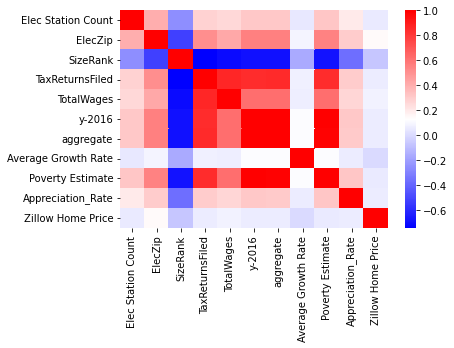

In [ ]:
#These are the columns with are target varibles and our new feautures
tmp = df.loc[:, ['Elec Station Count', 'ElecZip','SizeRank',
         'TaxReturnsFiled', 'TotalWages',
       'y-2016', 'aggregate', 'Average Growth Rate', 'Poverty Estimate', 'Appreciation_Rate','Zillow Home Price']]


sns.heatmap(tmp.corr(), 
            cmap = 'bwr') #Red is associated with positve cor, blue with neg
plt.show()

This plot is helpful because there are a reasonable amount of features and the color scheme allows it to be quickly interprated.

The First and most important thing we noticed is that every feature besides Average Growth Rate and Zillow Home Price are more corrolated with ElecZip, our catigorical varible, than the Elec Station Count, our regression varible.

There are some other interesting assepects one that stuck out to us was that TaxReturnsFiled has a postitive corrolation with our Poverty Estimate Varible, where we expected a negative corration due to unemployment.

It's also interesting to see that appreciation rate is mildly corrolated with all other indepentent features whereas zillow home price (the most recent home prices from zillow are not).

### Figure 2 Geographically Exploring Target Varibles



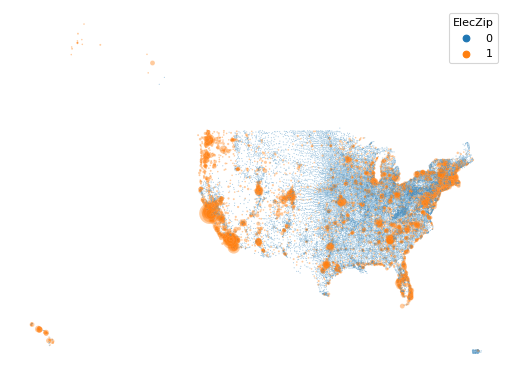

In [ ]:
figure(figsize=(8, 6), dpi=80) # Make a big map

sns.scatterplot(x = df['LNG'], y = df['LAT'], #Makes a Map
           hue = df['ElecZip'], # Color 
           s = (1 + df['Elec Station Count']), # This is needed so that zipcodes w/o stations will show
            alpha = .4, cmap = 'bwr')

plt.axis('off') #dont need axis here

plt.show()

Here we see that the most charging stations are in San Fransisco, LA, the New England/New York cost, Florida, chicago, Portland, and Seattle. This is interesting after viewing the Heatmap since traits like high housing prices and population typical for these areas but there must be a decent enough spread of charging stations through rural areas to negate these similarities on the extreme end of the spectrum. 


### Figure 3 Ev Station Count by State

In [ ]:
df_state = df.groupby('state_name').max().sort_values(by = ['EV Level1 EVSE Num', 'EV Level2 EVSE Num'], ascending = True)
fig = px.bar(df_state, x = df_state.index, y = 'Elec Station Count' , color = 'Elec Station Count', title = 'State vs. EV Station',
             labels = {'Elec Station Count': 'Most Charging Stations in a ZipCode','state_name' :'State/Territory Name'}) #X/Y Labels
fig.show()

Here we see a count plot of the amount of Electric Charging Stations in Each State (Including the terrotproes D.C. and Puerto Rico). This graph is helpful at placing the organge dots in our prevous graph into perspective. we now see how extreme the charging stations in califorina are it also shows that New York may not be as extreme compaired to the other states as we thought based on the map. However this is only plotting the zipcode with the most amount of charging stations. 

## Part Two: Exploring Electric Charging Features

### Table 1 Electric Varibles by Each State
This figure will help us get and overview of how each varible

In [ ]:
tmp = df.iloc[:, [1,2,3,4,5,6,7,21]]

tmp.groupby('state_name').agg(['mean', 'median', 'max'])

Elec Station Count               EV Level1 EVSE Num  \
                                   mean median    max               mean   
state_name                                                                 
Alabama                        0.413902    0.0   11.0           0.036862   
Alaska                         2.111111    1.0   18.0           0.000000   
Arizona                        1.984962    0.0   36.0           0.012531   
Arkansas                       0.253859    0.0   16.0           0.003431   
California                     7.962536    2.0  366.0           0.284376   
Colorado                       2.972549    0.0   75.0           0.114706   
Connecticut                    1.851986    1.0   26.0           0.094164   
Delaware                       1.686567    0.0   18.0           0.029851   
District of Columbia           8.689655    4.0   38.0           0.534483   
Florida                        2.559548    1.0   51.0           0.342916   
Georgia                        2.109267    0.0   70.0           0.130014   
Hawaii                         5.691176    2.0   37.0           0.194118   
Idaho                          0.479853    0.0   11.0           0.018315   
Illinois                       0.716461    0.0   34.0           0.031182   
Indiana                        0.443433    0.0   20.0           0.002601   
Iowa                           0.273605    0.0   19.0           0.015021   
Kansas                         0.684515    0.0   42.0           0.005789   
Kentucky                       0.240053    0.0    6.0           0.015915   
Louisiana                      0.308448    0.0   13.0           0.045187   
Maine                          0.635714    0.0   27.0           0.035714   
Maryland                       2.515152    0.0   48.0           0.073954   
Massachusetts                  3.657250    1.0   83.0           0.128688   
Michigan                       0.805955    0.0   43.0           0.024641   
Minnesota                      0.650229    0.0   23.0           0.115826   
Mississippi                    0.268765    0.0    8.0           0.181598   
Missouri                       0.998022    0.0   77.0           0.007913   
Montana                        0.197222    0.0    6.0           0.008333   
Nebraska                       0.270690    0.0   13.0           0.008621   
Nevada                         2.439306    1.0   44.0           0.023121   
New Hampshire                  0.630081    0.0   13.0           0.024390   
New Jersey                     1.216582    0.0   24.0           0.030457   
New Mexico                     0.498599    0.0   22.0           0.028011   
New York                       1.611429    0.0   69.0           0.012476   
North Carolina                 1.299499    0.0   39.0           0.025689   
North Dakota                   0.154856    0.0    9.0           0.000000   
Ohio                           0.729043    0.0   61.0           0.027942   
Oklahoma                       0.455108    0.0   11.0           0.015480   
Oregon                         4.780612    3.0   37.0           0.254252   
Pennsylvania                   0.616516    0.0   34.0           0.020739   
Puerto Rico                    0.054264    0.0    2.0           0.007752   
Rhode Island                   3.038961    1.0   24.0           0.649351   
South Carolina                 0.892344    0.0   24.0           0.028708   
South Dakota                   0.140541    0.0    9.0           0.002703   
Tennessee                      1.101449    0.0   81.0           0.033011   
Texas                          1.156381    0.0   59.0           0.048588   
Utah                           2.767606    0.0   59.0           0.045775   
Vermont                        1.261905    0.0   26.0           0.275794   
Virginia                       1.150342    0.0   43.0           0.213364   
Washington                     5.896194    3.0  105.0           0.308684   
West Virginia                  0.146724    0.0    7.0           0.024

While this table isn't the easiest to read it is fully of interesting information. Aggreigating each state by median, and mean shows us the affect of "outliers", as we saw in figure 2 these outliers are explaned by location.

The value of the median column is most prevelent when viewing the target varilbe, inorder for a value greater than 0 in this column we know that by definition at least half the zipcodes in these states have electric charging stations.

There is potentail for more value to be extracted from this table as well. If an industry expert can identify types of electric cars from their charging port we would be able to investigate if consumer trends affect the devlopement of charging stations.

In [ ]:
df.columns

Index(['ZIP', 'Elec Station Count', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num',
       'EV DC Fast Count', 'EV Connector Types', 'EV pricing clean',
       'EV On-Site Renewable Source', 'LAT', 'LNG', 'SizeRank',
       'Appreciation_Rate', 'Decommisioned', 'TaxReturnsFiled', 'TotalWages',
       'y-2016', 'aggregate', 'Average Growth Rate', 'Poverty Estimate',
       'city', 'state_id', 'state_name', 'Zillow Home Price', 'ElecZip'],
      dtype='object')

### Figure 4 charging Port Types

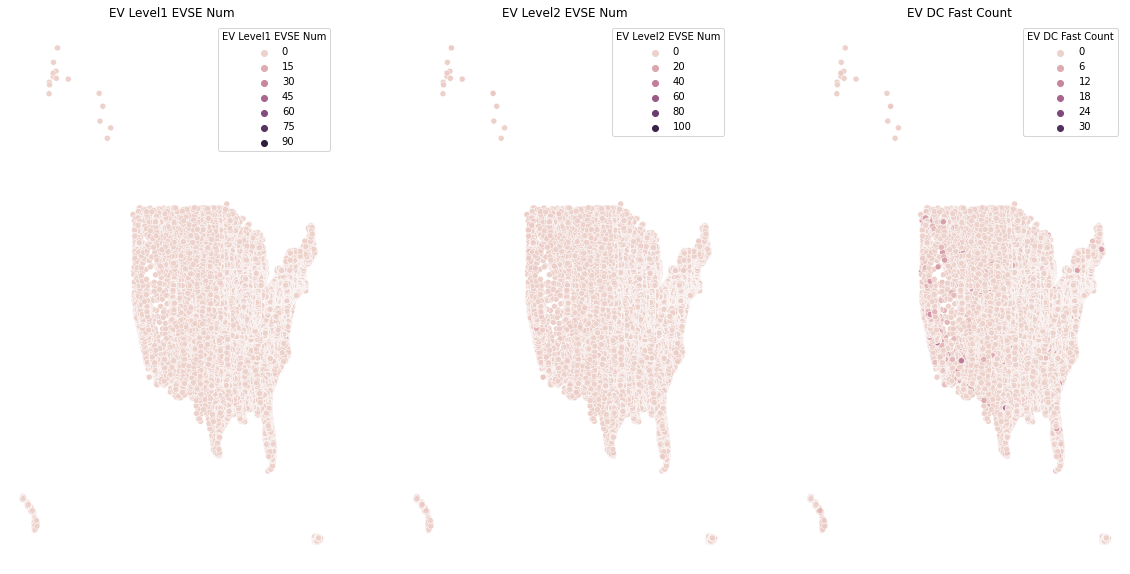

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=True) #Setting up a subfigure

#Make a map for each varible
sns.scatterplot(ax = axes[0], data = df, x = 'LNG', y = 'LAT', hue = 'EV Level1 EVSE Num', legend = 'brief')

sns.scatterplot(ax = axes[1], data = df, x = 'LNG', y = 'LAT', hue = 'EV Level2 EVSE Num', legend = 'brief')

sns.scatterplot(ax = axes[2], data = df, x = 'LNG', y = 'LAT', hue = 'EV DC Fast Count', legend = 'brief')

#Titles
axes[0].set_title('EV Level1 EVSE Num')
axes[1].set_title('EV Level2 EVSE Num')
axes[2].set_title('EV DC Fast Count')


#dont need axis here
axes[0].axis('off') 
axes[1].axis('off')
axes[2].axis('off')
plt.show()

It appears that the EV Level 1 and Level2 Charging Ports are uniformly distriubted throughout the country, however it appears that the EV DC Fast Charging Ports is consitrated in wealthy areas with a high population as the highest consintrations are in the same geograpich areas as the highest counts of charging stations. This relationship will be investigated farther.

### Exploring Relationships between independent varibles

### Figure 5 Flushing Out EV DC Fast Charging Ports

In [ ]:
df.columns

Index(['ZIP', 'Elec Station Count', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num',
       'EV DC Fast Count', 'EV Connector Types', 'EV pricing clean',
       'EV On-Site Renewable Source', 'LAT', 'LNG', 'SizeRank',
       'Appreciation_Rate', 'Decommisioned', 'TaxReturnsFiled', 'TotalWages',
       'y-2016', 'aggregate', 'Average Growth Rate', 'Poverty Estimate',
       'city', 'state_id', 'state_name', 'Zillow Home Price', 'ElecZip'],
      dtype='object')

In [ ]:
tmp = df.loc[:,['EV DC Fast Count', 'Appreciation_Rate', 'TotalWages','Zillow Home Price', 'y-2016', 'Poverty Estimate', 'Average Growth Rate']]

#Getting all the varibles on the same scale 
cols = tmp.columns

scaler = MinMaxScaler()

tmp = pd.DataFrame(scaler.fit_transform(tmp), columns = cols)


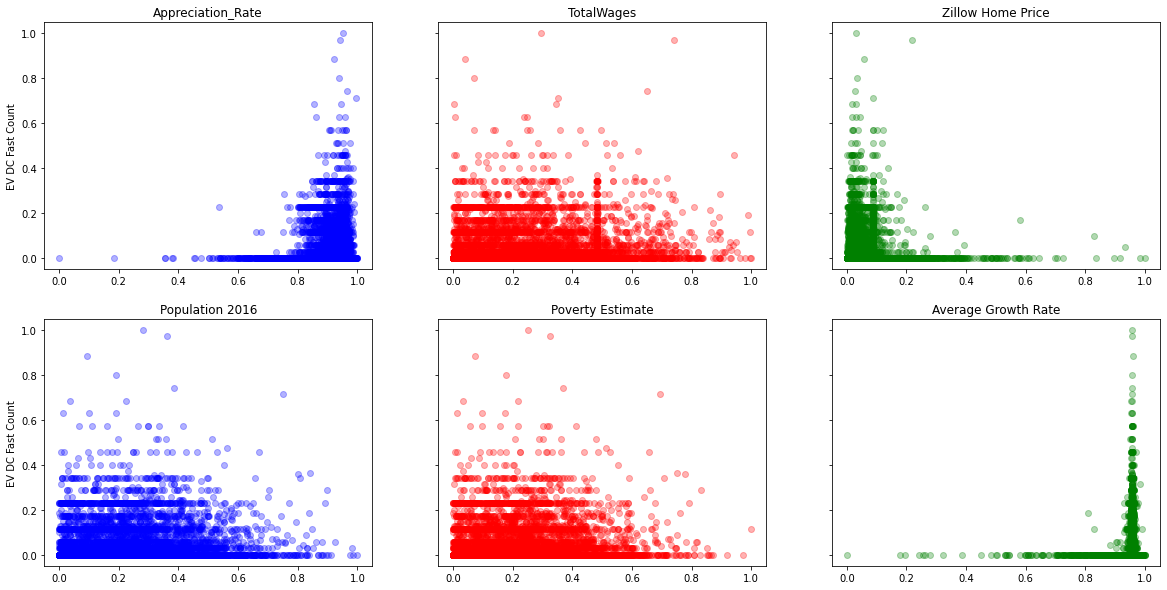

In [ ]:
fig,ax = plt.subplots(2, 3, figsize=(20, 10), sharey=True)

#A scatterplot for every 'wealthy city Varible' (home prices, growth, income)
ax[0,0].scatter(x = tmp['Appreciation_Rate'], y = tmp['EV DC Fast Count'] , c = 'b', alpha = .3 )
ax[0,1].scatter(x = tmp['TotalWages'], y = tmp['EV DC Fast Count'] , c = 'r', alpha = .3 )
ax[0,2].scatter(x = tmp['Zillow Home Price'], y = tmp['EV DC Fast Count'] , c = 'g', alpha = .3 )
ax[1,0].scatter(x = tmp['y-2016'], y = tmp['EV DC Fast Count'] , c = 'b', alpha = .3 )
ax[1,1].scatter(x = tmp['Poverty Estimate'], y = tmp['EV DC Fast Count'] , c = 'r', alpha = .3 )
ax[1,2].scatter(x = tmp['Average Growth Rate'], y = tmp['EV DC Fast Count'] , c = 'g', alpha = .3 )

#Setting Titles
ax[0,0].set_title('Appreciation_Rate')
ax[0,1].set_title('TotalWages')
ax[0,2].set_title('Zillow Home Price')
ax[1,0].set_title('Population 2016')
ax[1,1].set_title('Poverty Estimate')
ax[1,2].set_title('Average Growth Rate')

#All Graphs share a y-axis
ax[0,0].set_ylabel('EV DC Fast Count')
ax[1,0].set_ylabel('EV DC Fast Count')

plt.show()

We are compairing all the wealth related varibles compaired to the count of EV DC Fast Charging Ports on a MinMaxscaler. (Note: the scaler does not change the shape of the scatterplots, instead it allows for a cleaner and more interateable x & y axis as there are consistant values of the quartiles)

The most valueable take away from this graph is that the zipcodes with the top 80 percent of appreciating housuing makets have almost all of the EV DC charging stations but the charging stations are also located in the zipcodes with some of the lowest priced houses. When the growth rate chart is factored in we can conclude that these charging ports are being installed in "Up and Coming neigbhor hoods."

### Table 2: Using a Table to Investiagte Up and Coming Neigbhorhoods hypothesis

In [ ]:
tmp = df.loc[:,['city', 'state_id','EV DC Fast Count', 'Appreciation_Rate','Zillow Home Price', 'y-2016',  'Average Growth Rate']]

tmp.set_index('city').sort_values(by = ['EV DC Fast Count', 'Appreciation_Rate'], ascending = False)

,state_id,EV DC Fast Count,Appreciation_Rate,Zillow Home Price,y-2016,Average Growth Rate
city,,,,,,
Miami,FL,35.0,3.155077,253285.0,32365.0,0.673126
San Francisco,CA,34.0,2.981995,1753458.0,41662.0,1.146300
Firebaugh,CA,31.0,2.650075,469892.0,10632.0,1.412179
Arvin,CA,28.0,2.932808,284773.0,22106.0,0.754805
Carlsbad,CA,26.0,3.374775,244159.0,44330.0,1.154652
...,...,...,...,...,...,...
Sandy Ridge,PA,0.0,-6.627570,349292.0,281.0,-10.167768
Dawson,IA,0.0,-6.989604,79912.0,299.0,1.767797
Decatur,IA,0.0,-6.989604,97357.0,225.0,-4.888889


While this is a very large table it does support our hypothesis that "up and coming" areas are a indicator of electric vehicle charging stations. Just in the limited veiw we see that cities with high home prices like Shreveport, LA that are dying out have no charging stations while a city like Arvin, CA with half the home price value but and above average apperiaction rate, and positive growth rate is one of the largest chargining station cities. 

This table will also do a great job of explain demergraphics at a neighbor hood level when analyized. An example of this are the two Shreveport, LA zipcodes with the two lowest apperiaction rates in the dataset. We can see that even though the city as a whole is likely in decline, their is still a geographic wealth disparity seen by the Zillow Home Price difference.

Seeing the changing aeras within the city at this level will allow us to guess what the "Good" parts of the city are, which will likely be locations, or future locations of Charging Stations

### Figure 6: Geographic View of Poverty Estimate

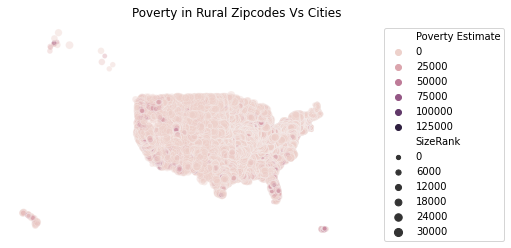

In [ ]:
fig,ax = plt.subplots()



sns.scatterplot( data = df, x = 'LNG', y = 'LAT', #map
                size = 'SizeRank', #This way we can see if rual areas or cities have more poverty
                hue = 'Poverty Estimate', #to identify Poverty levels
                alpha = .4)

plt.legend(loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

plt.title("Poverty in Rural Zipcodes Vs Cities", loc = 'right')
plt.axis('off') 
plt.show()

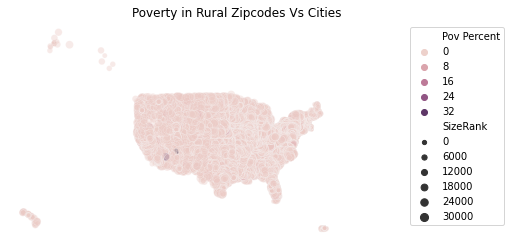

In [ ]:
fig,ax = plt.subplots()

tmp = df

tmp['Pov Percent'] = tmp['Poverty Estimate'] / tmp['y-2016']

sns.scatterplot( data = tmp, x = 'LNG', y = 'LAT', #map
                size = 'SizeRank', #This way we can see if rual areas or cities have more poverty
                hue = 'Pov Percent', #to identify Poverty levels
                alpha = .4)

plt.legend(loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

plt.title("Poverty in Rural Zipcodes Vs Cities", loc = 'right')
plt.axis('off') 
plt.show()

By setting the 'size' argument in the plotting function to 'SizeRank' we now have a completely filled in map of the lower 48. This shows that the zipcode size rank is associated with rural zipcodes. 

By creating 2 maps, one with the poverty esimate as people and the other as a percentage of the population, we see that poverty the proportion of people living in poverty only has one "Hot Spot" in the Arizona, Nevada Aera. It would be interesting to see what sets this aera apart from the entire country. 

The two graphs also show that there may be more people living in poverty in cities, the proportion is vitually uniform throughout the country.

###Table 3 Economic status of each state by income

In [ ]:
tmp1 = df.iloc[:, [11,12]]

tmp1.groupby(df['state_name']).agg(['mean', 'median', 'max'])


Appreciation_Rate                     Decommisioned  \
                                  mean    median       max          mean   
state_name                                                                 
Alabama                       1.547873  1.600985  3.534351           0.0   
Alaska                        1.801375  1.771999  2.762266           0.0   
Arizona                       2.771710  2.981264  3.890906           0.0   
Arkansas                      1.976167  2.152880  3.417316           0.0   
California                    2.878685  3.151289  3.965001           0.0   
Colorado                      2.663955  2.838880  3.856349           0.0   
Connecticut                   2.203568  2.203568  2.203568           0.0   
Delaware                      2.271835  2.395834  3.268502           0.0   
District of Columbia          3.016597  3.122805  3.659864           0.0   
Florida                       2.903653  2.999537  3.745719           0.0   
Georgia                       2.302211  2.432778  3.585851           0.0   
Hawaii                        2.920040  3.285904  3.827476           0.0   
Idaho                         2.439514  2.422749  3.604356           0.0   
Illinois                      1.287152  1.361961  3.424447           0.0   
Indiana                       1.807532  1.871461  3.064256           0.0   
Iowa                          1.456810  1.497446  3.288258           0.0   
Kansas                        1.338427  1.447247  3.258213           0.0   
Kentucky                      1.746916  1.886285  3.508703           0.0   
Louisiana                     1.120208  1.265257  3.881527           0.0   
Maine                         2.203568  2.203568  2.203568           0.0   
Maryland                      2.501399  2.560289  3.389311           0.0   
Massachusetts                 2.203568  2.203568  2.203568           0.0   
Michigan                      1.868619  1.912200  3.704163           0.0   
Minnesota                     1.986263  1.994405  3.282447           0.0   
Mississippi                   1.095984  1.136068  3.236935           0.0   
Missouri                      1.690597  1.783912  3.373873           0.0   
Montana                       1.645303  1.900779  3.016936           0.0   
Nebraska                      1.856588  1.976295  3.588851           0.0   
Nevada                        2.652186  2.752758  3.547639           0.0   
New Hampshire                 2.203568  2.203568  2.203568           0.0   
New Jersey                    2.203568  2.203568  2.203568           0.0   
New Mexico                    1.484864  1.463442  2.874997           0.0   
New York                      2.680050  2.730675  3.974502           0.0   
North Carolina                2.071327  2.208918  3.431396           0.0   
North Dakota                  1.043050  1.123334  3.255835           0.0   
Ohio                          1.846109  1.976778  3.770372           0.0   
Oklahoma                      2.208538  2.326031  3.483201           0.0   
Oregon                        2.851939  2.959612  3.537954           0.0   
Pennsylvania                  1.906526  2.121169  3.927981           0.0   
Puerto Rico                   2.203568  2.203568  2.203568           0.0   
Rhode Island                  2.203568  2.203568  2.203568           0.0   
South Carolina                1.986868  2.117109  3.423711           0.0   
South Dakota                  1.592322  1.757616  3.035418           0.0   
Tennessee                     2.587769  2.708946  3.641470           0.0   
Texas                         2.143926  2.209634  3.855586           0.0   
Utah                          2.609901  2.649698  3.242682           0.0   
Vermont                       2.203568  2.203568  2.203568           0.0   
Virginia                      1.906314  1.920119  3.338322           0.0   
Washington                    2.946237  3.098106  3.661567           0.0   
West Virginia                 1.264149  1.266045  3.395291           

This table explains us about state wise distribution of economic index. Looking at the table we can understand how income levels vs tax returns on average look like for each state. 

### Table 4 State wise poverty estimates 

In [ ]:
tmp2 = df.iloc[:, [16]]

tmp2.groupby(df['state_name']).agg(['mean', 'median', 'max'])


aggregate                    
                               mean    median       max
state_name                                             
Alabama                53063.048973   28885.0  359035.0
Alaska                 92302.444444   70862.0  379652.0
Arizona               114204.260652   59022.0  517463.0
Arkansas               35218.842196   10721.0  386129.0
California            152328.507205  116088.0  741980.0
Colorado               70546.296078   19376.0  496967.0
Connecticut            90475.815884   59742.0  463434.0
Delaware               95157.716418   61632.0  424476.0
District of Columbia  150335.137931  110708.0  438213.0
Florida               137978.874743  120473.0  521575.0
Georgia                95188.034578   46054.0  584120.0
Hawaii                135335.426471   63228.0  524908.0
Idaho                  40712.824176    8676.0  370451.0
Illinois               65181.986947   13591.0  797117.0
Indiana                59344.460338   23213.0  481513.0
Iowa                   23025.056867    7081.5  305512.0
Kansas                 29052.468886    6981.0  532142.0
Kentucky               40532.668435   11110.5  397923.0
Louisiana              62835.013752   26773.0  390417.0
Maine                  22131.295238   10710.0  314654.0
Maryland               88540.530303   35878.0  484140.0
Massachusetts          87228.903955   59876.0  420831.0
Michigan               71135.410678   33011.5  441467.0
Minnesota              42996.983945   12826.0  385532.0
Mississippi            50426.191283   21161.0  337343.0
Missouri               41608.363996   10967.0  503973.0
Montana                19470.705556    3421.0  352163.0
Nebraska               22268.829310    5503.0  274689.0
Nevada                111024.693642   51655.0  505280.0
New Hampshire          37561.918699   18524.5  257868.0
New Jersey            104678.370558   72034.0  654756.0
New Mexico             40460.033613    6423.0  533208.0
New York               78013.305143   22333.0  761856.0
North Carolina         84814.393484   43169.0  521273.0
North Dakota           12762.603675    2787.0  337874.0
Ohio                   68460.398815   28876.0  481776.0
Oklahoma               41090.464396   12686.5  421455.0
Oregon                119515.790816   86126.0  486793.0
Pennsylvania           50393.236991   17200.5  522302.0
Puerto Rico           198421.217054  179137.0  746778.0
Rhode Island           95741.688312   73486.0  313846.0
South Carolina         78569.428230   38483.5  477037.0
South Dakota           15647.286486    4623.5  308065.0
Tennessee              72219.795491   32333.0  586942.0
Texas                  94320.601987   39116.5  796892.0
Utah                   69585.186620   11083.5  473707.0
Vermont                17384.503968    7641.5  197888.0
Virginia               64658.258542   20759.0  533463.0
Washington            138920.010381  141967.0  500536.0
West Virginia          18447.656695    5838.5  301432.0
Wisconsin              52106.084746   20099.0  424682.0
Wyoming                23462.329412    3681.0  252626.0

Looking at this table we can understand the poverty population distribution of each state. 



### Figure 7 Home price in relation to the location to understand economic status of each location better

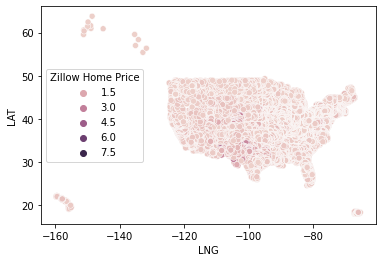

In [ ]:
sns.scatterplot(x = 'LNG', y = 'LAT', hue = 'Zillow Home Price', data = df )
plt.show()

Usually the inflation rate of each state is defined by the average home price in that state. It talks about the economic status of that particular state. Above plot expalins us the same.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31902 entries, 11537 to 11522
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ZIP                          31902 non-null  object 
 1   Elec Station Count           31902 non-null  float64
 2   EV Level1 EVSE Num           31902 non-null  float64
 3   EV Level2 EVSE Num           31902 non-null  float64
 4   EV DC Fast Count             31902 non-null  float64
 5   EV Connector Types           31902 non-null  float64
 6   EV pricing clean             31902 non-null  float64
 7   EV On-Site Renewable Source  31902 non-null  float64
 8   LAT                          31902 non-null  float64
 9   LNG                          31902 non-null  float64
 10  SizeRank                     31902 non-null  float64
 11  Appreciation_Rate            31902 non-null  float64
 12  Decommisioned                31902 non-null  bool   
 13  TaxReturnsFi

### Figure 8 Correlation Matrix between all the variables

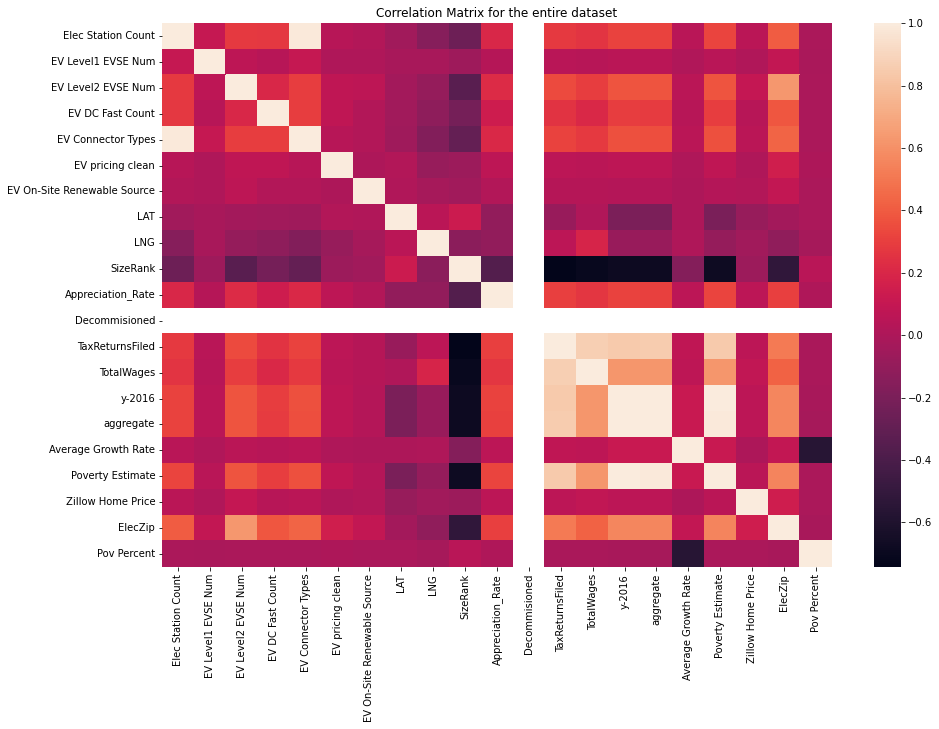

In [ ]:
plt.figure(figsize=(15,10)) # Setting the figure size to make it clearly visible
sns.heatmap(df.corr()) # Plotting a heat map to display correlations between variables
plt.title("Correlation Matrix for the entire dataset") # Setting a title to the plot
plt.show()

After looking at the correlation plot, we can interpret the following
1.   Elect station count is highly correlated to EV level 2 and EV Connector types
2.   Average growth rate is negatively correlated to Pov percentage



The above states have relatively less EV stations than other states. We feel that a resident in one of the above states who owns an electric vehicle may feel inconvienienced since there aren't many charging stations available.

### Table 5 Cities with max EV stations

The above results shows the top cities in terms of EV charging station abundance. Owning an electric car in one of the above state wouldn't be an inconvenience. 

In [ ]:
# Top 10 cities sorted by count of electric stations 
df[['city','Elec Station Count']].sort_values(by=['Elec Station Count'], ascending = False).head(10)

,city,Elec Station Count
10489,Menlo Park,366.0
10680,Santa Clara,257.0
10232,Irvine,223.0
10505,South San Francisco,171.0
10274,Anaheim,137.0
10619,Oakland,128.0
10529,San Francisco,124.0
10087,San Diego,124.0
9899,Long Beach,112.0
10877,Sacramento,110.0


Looking at the table, we can understand majority of ev stations are based in California. Let us verify this by exploring the same data state wise.

###Tabel 6 10 EV station count vs states 

In [ ]:
# Top 10 EV station count vs states 
df[['state_name','Elec Station Count']].sort_values(by=['Elec Station Count'], ascending = False).head(10)

,state_name,Elec Station Count
10489,California,366.0
10680,California,257.0
10232,California,223.0
10505,California,171.0
10274,California,137.0
10619,California,128.0
10529,California,124.0
10087,California,124.0
9899,California,112.0
10877,California,110.0


###Figure 9 Exploring different station types in california state

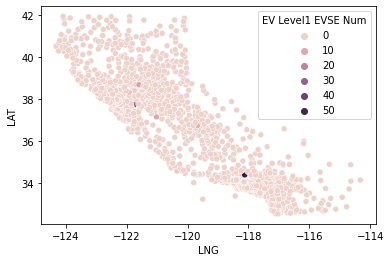

In [ ]:
df_calif = df[df["state_name"] == 'California']
sns.scatterplot(x = 'LNG', y = 'LAT', hue = 'EV Level1 EVSE Num', data = df_calif )
plt.show()

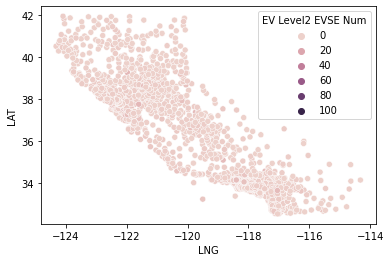

In [ ]:
df_calif = df[df["state_name"] == 'California']
sns.scatterplot(x = 'LNG', y = 'LAT', hue = 'EV Level2 EVSE Num', data = df_calif )
plt.show()

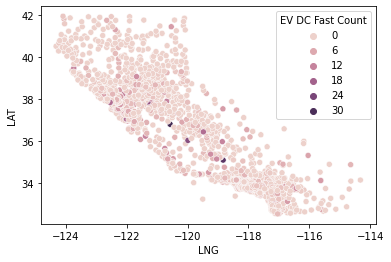

In [ ]:
df_calif = df[df["state_name"] == 'California']
sns.scatterplot(x = 'LNG', y = 'LAT', hue = 'EV DC Fast Count', data = df_calif )
plt.show()

After analyzing the spread of the three types of EV stations, it can be seen that EV DC Fast stations are in a relative larger quantity in California.

###Figure 10 Density Plot on EV Pricing

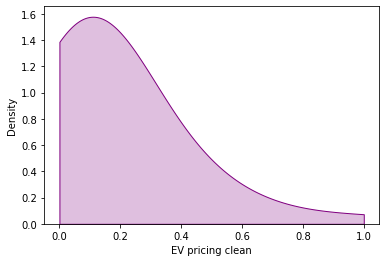

In [ ]:
df_price = df[df["EV pricing clean"] > 0]
sns.kdeplot(df_price['EV pricing clean'], shade=True, color='purple',cut =0, clip=(0,1))
plt.show()

Through analyzing the distribution of the pricing on EV stations, we can infer that most of charging stations cost around 0.15 cents - 0.20 cents. 

###Table 7 Existence of EV Charging by State

In [ ]:
tmp3 = df.copy()
tmp3["update"] = np.where(df['Elec Station Count'] > 0, 'Having EV station', 'Not having EV station')
pd.pivot_table(tmp3, index = tmp3['update'], aggfunc=["mean"])

mean                                    \
                      Appreciation_Rate Average Growth Rate Decommisioned   
update                                                                      
Having EV station              2.444344            0.229283           0.0   
Not having EV station          1.872427           -1.153694           0.0   

                                                                              \
                      EV Connector Types EV DC Fast Count EV Level1 EVSE Num   
update                                                                         
Having EV station               6.017636         1.365614           0.262052   
Not having EV station           0.133391         0.000000           0.000000   

                                                                      \
                      EV Level2 EVSE Num EV On-Site Renewable Source   
update                                                                 
Having EV station               2.106289                     0.00691   
Not having EV station           0.000000                     0.00000   

                                                           ...             \
                      EV pricing clean Elec Station Count  ...        LAT   
update                                                     ...              
Having EV station             0.088694           5.284093  ...  38.280388   
Not having EV station         0.000000           0.000000  ...  38.697799   

                                                                             \
                             LNG Pov Percent Poverty Estimate      SizeRank   
update                                                                        
Having EV station     -92.529757    1.002163     23156.411481   6487.504943   
Not having EV station -89.115365    1.023429      4928.505522  18104.130696   

                                                                       \
                      TaxReturnsFiled    TotalWages Zillow Home Price   
update                                                                  
Having EV station        10416.011570  4.958008e+08     402860.422984   
Not having EV station     3301.737261  1.586889e+08     292178.136265   

                                                    
                           aggregate        y-2016  
update                                              
Having EV station      157429.618513  23063.229948  
Not having EV station   34509.570696   4978.201391  

[2 rows x 21 columns]

Statistics based on regions with and without EV stations. 


###Table 8 Onsite Renewables on other Elec Variables

In [ ]:
tmp4 = df.loc[:, ['Elec Station Count', 'EV Level1 EVSE Num',	'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV On-Site Renewable Source']]
tmp4["source"] = np.where(df['EV On-Site Renewable Source'] > 0, 'Has a renewable source', 'does not have a renewable source')
pd.pivot_table(tmp4, index = tmp4['source'], aggfunc=["mean"])

mean                     \
                                 EV DC Fast Count EV Level1 EVSE Num   
source                                                                 
Has a renewable source                   1.685087           0.509756   
does not have a renewable source         0.372630           0.070300   

                                                     \
                                 EV Level2 EVSE Num   
source                                                
Has a renewable source                     2.599807   
does not have a renewable source           0.574730   

                                                              \
                                 EV On-Site Renewable Source   
source                                                         
Has a renewable source                              0.300067   
does not have a renewable source                    0.000000   

                                                     
                                 Elec Station Count  
source                                               
Has a renewable source                    11.565854  
does not have a renewable source           1.409219

Regions with renewable source contain a higher mean count of EV stations and charinging ports. This is surpirsing as a feature because of how few regions have on-site renewable energy sources


### Table 9 Onsite Renewable on Socioeconomic Variables

In [ ]:
tmp5 = df.loc[:, ['TotalWages', 'Zillow Home Price','Appreciation_Rate','Poverty Estimate', 'y-2016']] 
tmp5["source"] = np.where(df['EV On-Site Renewable Source'] > 0, 'Has a renewable source', 'does not have a renewable source')
pd.pivot_table(tmp5, index = tmp4['source'], aggfunc=["mean"])

mean                   \
                                 Appreciation_Rate Poverty Estimate   
source                                                                
Has a renewable source                    2.548483     23298.770732   
does not have a renewable source          2.028676      9928.944506   

                                                                                
                                    TotalWages Zillow Home Price        y-2016  
source                                                                          
Has a renewable source            5.454453e+08     528926.154634  23339.248780  
does not have a renewable source  2.508644e+08     321731.733533   9938.573335

Regions with renewable source contain a higher socioeconomic veribles. This expresses a likely cost assciated with maintaining and instailling renewable energy sources. We also see that our population varible has a mean of more than double this could mean that the demand for renewable energy sources is incredible low so areas with more people are more likely to have someone that wants renewable fuel stations.




###Table 10 EV Pricing Compared to other Socio-Economic Varibles

In [ ]:
df.columns

Index(['ZIP', 'Elec Station Count', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num',
       'EV DC Fast Count', 'EV Connector Types', 'EV pricing clean',
       'EV On-Site Renewable Source', 'LAT', 'LNG', 'SizeRank',
       'Appreciation_Rate', 'Decommisioned', 'TaxReturnsFiled', 'TotalWages',
       'y-2016', 'aggregate', 'Average Growth Rate', 'Poverty Estimate',
       'city', 'state_id', 'state_name', 'Zillow Home Price', 'ElecZip',
       'Pov Percent'],
      dtype='object')

In [ ]:
tmp6 = df.loc[:, ['city','state_id','EV pricing clean', 'TaxReturnsFiled',
              'TotalWages', 'Average Growth Rate', 'Zillow Home Price', 'Appreciation_Rate']]
for_mean = ['EV pricing clean', 'TaxReturnsFiled','TotalWages', 'Average Growth Rate', 'Zillow Home Price', 'Appreciation_Rate']
table10 = pd.DataFrame(pd.pivot_table(tmp6, index = tmp6['city'], 
               aggfunc={'state_id':'first', 'EV pricing clean' : 'mean', 'TaxReturnsFiled' : 'mean',
                        'TotalWages' : 'mean', 'Average Growth Rate' : 'mean', 'Zillow Home Price' : 'mean', 'Appreciation_Rate' : 'mean'})) #Doing a dict to keep state id
table10 = table10.reindex(['state_id','EV pricing clean','TaxReturnsFiled',
              'TotalWages', 'Average Growth Rate', 'Zillow Home Price', 'Appreciation_Rate'], axis=1) #Ordering the table to a more logical order
display(table10.sort_values('EV pricing clean', ascending=False)) #Making EV price in decending order

,state_id,EV pricing clean,TaxReturnsFiled,TotalWages,Average Growth Rate,Zillow Home Price,Appreciation_Rate
city,,,,,,,
Welches,OR,7.5,1174.0,38198274.0,1.305325,430007.0,3.043415
Chimacum,WA,7.5,1030.0,27953418.0,-1.960440,149324.0,1.881280
Government Camp,OR,7.5,5679.0,201812501.0,-8.508403,339595.0,3.246369
Veneta,OR,7.5,3643.0,119874723.0,-0.191916,140161.0,2.856820
Sultan,WA,7.5,3005.0,122043959.0,0.137301,133439.0,2.891607
...,...,...,...,...,...,...,...
Gove,KS,0.0,2618.0,67588640.0,0.770599,478086.0,0.879172
Gowanda,NY,0.0,2395.0,68311228.0,-0.845096,712707.1,2.001380
Gowen,MI,0.0,1701.0,56581104.0,0.992063,159595.0,2.763361


This table will show us if there are SocioEconomic relationships that affect EV Charing Prices. We can clearly see a relationship between tax-returns and appreciation rates between the cities with the highest charging price and having no charing type. It would be interesting to see if the trend exisit in the middle priced charging stations cities as well.

# Modeling


In [ ]:
# one hot encoding the decommisioned column
df = pd.get_dummies(df, columns=['Decommisioned'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31902 entries, 11537 to 11522
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ZIP                          31902 non-null  object 
 1   Elec Station Count           31902 non-null  float64
 2   EV Level1 EVSE Num           31902 non-null  float64
 3   EV Level2 EVSE Num           31902 non-null  float64
 4   EV DC Fast Count             31902 non-null  float64
 5   EV Connector Types           31902 non-null  float64
 6   EV pricing clean             31902 non-null  float64
 7   EV On-Site Renewable Source  31902 non-null  float64
 8   LAT                          31902 non-null  float64
 9   LNG                          31902 non-null  float64
 10  SizeRank                     31902 non-null  float64
 11  Appreciation_Rate            31902 non-null  float64
 12  TaxReturnsFiled              31902 non-null  float64
 13  TotalWages  

In [ ]:
# Storing metadata
df_metadata = df[['ZIP', 'city', 'state_id']]

## Classification

In [ ]:
# dropping columns not necessary for the models
df_cls = df.drop(columns = ['Elec Station Count', 'ZIP', 'city', 'state_id', 'state_name', 'LAT', 'LNG'])

In [ ]:
# Checking the info
df_cls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31902 entries, 11537 to 11522
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EV Level1 EVSE Num           31902 non-null  float64
 1   EV Level2 EVSE Num           31902 non-null  float64
 2   EV DC Fast Count             31902 non-null  float64
 3   EV Connector Types           31902 non-null  float64
 4   EV pricing clean             31902 non-null  float64
 5   EV On-Site Renewable Source  31902 non-null  float64
 6   SizeRank                     31902 non-null  float64
 7   Appreciation_Rate            31902 non-null  float64
 8   TaxReturnsFiled              31902 non-null  float64
 9   TotalWages                   31902 non-null  float64
 10  y-2016                       31902 non-null  float64
 11  aggregate                    31902 non-null  float64
 12  Average Growth Rate          31902 non-null  float64
 13  Poverty Esti

### Baseline: Logistic Regression (All variables)

In [ ]:
# Seperating the predictor variables and the target variable
X_cls_base = df_cls.drop(columns=['ElecZip'])
y_cls_base = df_cls['ElecZip']

In [ ]:
# Splitting the data into train and test
X_cls_base_train, X_cls_base_test, y_cls_base_train, y_cls_base_test = train_test_split(X_cls_base, y_cls_base, train_size=0.8, random_state=7)

In [ ]:
# Checking the shape of train, test
print(X_cls_base_train.shape)
print(y_cls_base_train.shape)
print(X_cls_base_test.shape)
print(y_cls_base_test.shape)

(25521, 17)
(25521,)
(6381, 17)
(6381,)


In [ ]:
# Converting variables to numpy arrays
X_cls_base_train = np.array(X_cls_base_train)
X_cls_base_test = np.array(X_cls_base_test)
y_cls_base_train = np.array(y_cls_base_train)
y_cls_base_test = np.array(y_cls_base_test)

In [ ]:
# Scaling the data to avoid data leakage
scaler = MinMaxScaler()
X_cls_base_train = scaler.fit_transform(X_cls_base_train)
X_cls_base_test = scaler.transform(X_cls_base_test)

In [ ]:
# storing the model in a variable
LR = LogisticRegression()
# fitting the model
LR = LR.fit(X_cls_base_train, y_cls_base_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# storing the predictions
cls_base_train_preds = LR.predict(X_cls_base_train)
cls_base_test_preds = LR.predict(X_cls_base_test)

#### Error Metrics

In [ ]:
# Checking the classification report for train set
print(classification_report(y_true = y_cls_base_train, y_pred = cls_base_train_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     18430
           1       0.92      0.74      0.82      7091

    accuracy                           0.91     25521
   macro avg       0.91      0.86      0.88     25521
weighted avg       0.91      0.91      0.90     25521



In [ ]:
# Checking the classification report for test set
print(classification_report(y_true = y_cls_base_test, y_pred = cls_base_test_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4570
           1       0.91      0.75      0.82      1811

    accuracy                           0.91      6381
   macro avg       0.91      0.86      0.88      6381
weighted avg       0.91      0.91      0.91      6381



In [ ]:
# Checking the confusion matrix for train set
confusion_matrix(y_true = y_cls_base_train, y_pred = cls_base_train_preds)

array([[17949,   481],
       [ 1867,  5224]])

In [ ]:
# Checking the confusion matrix for test set
confusion_matrix(y_true = y_cls_base_test, y_pred = cls_base_test_preds)

array([[4443,  127],
       [ 454, 1357]])

### Hyperparameter Tuned Model

In [ ]:
# Variable selection (selection the variables whose correlation with the target variable is greater than 0.3)
cor = df_cls.corr()
cor_target = abs(cor['ElecZip'])
relevant_features = cor_target[cor_target>0.3]
relevant_features

EV Level2 EVSE Num    0.629363
EV DC Fast Count      0.382348
EV Connector Types    0.432004
SizeRank              0.522258
Appreciation_Rate     0.301073
TaxReturnsFiled       0.511000
TotalWages            0.427829
y-2016                0.558944
aggregate             0.557778
Poverty Estimate      0.555782
ElecZip               1.000000
Name: ElecZip, dtype: float64

In [ ]:
# Seperating the predictor variables and the target variable
X_cls_hp = df_cls[['EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Connector Types', 'SizeRank', 'Appreciation_Rate',
                   'TaxReturnsFiled', 'TotalWages', 'y-2016', 'aggregate', 'Poverty Estimate']]
y_cls_hp = df_cls['ElecZip']

In [ ]:
# Splitting into train and test set
X_cls_hp_train, X_cls_hp_test, y_cls_hp_train, y_cls_hp_test, X_cls_hp_train_meta, X_cls_hp_test_meta = train_test_split(X_cls_hp, y_cls_hp, df_metadata, 
                                                    train_size=0.8, 
                                                    random_state=7)

In [ ]:
# Spot checking algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=100000000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [ ]:
# evaluating each model in turn
results = []
names = []

for name, model in models:
	kfold = KFold(n_splits=10, random_state=7, shuffle=True)
	cv_results = cross_val_score(model, X_cls_hp_train, y_cls_hp_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.822381 (0.007801)
KNN: 0.790094 (0.008477)
CART: 0.991928 (0.001360)
NB: 0.793072 (0.010325)


We can see that Decision Tree Classifier has performed the best. So we will tune this model along with Random Forest Classifier.

In [ ]:
# Constructing pipeline

pipe_cls_dt = Pipeline([('scl', StandardScaler()),
			('clf', DecisionTreeClassifier(random_state=42))])

pipe_cls_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier(random_state=42))])

In [ ]:
# Setting grid search params

grid_params_cls_dt = [{'clf__criterion': ['gini', 'entropy'],
                  'clf__min_samples_leaf': [5, 10, 20, 25],
                  'clf__max_depth': [3, 5, 10, 15, 20],
                  'clf__min_samples_split': [5, 10, 20, 25]}]

grid_params_cls_rf = [{'clf__criterion': ['gini', 'entropy'],
                  'clf__min_samples_leaf': [5, 10],
                  'clf__max_depth': [3, 5, 10],
                  'clf__min_samples_split': [5, 10]}]

In [ ]:
# Constructing grid searches

gs_cls_dt = GridSearchCV(estimator=pipe_cls_dt,
    param_grid=grid_params_cls_dt,
    scoring='accuracy',
    cv=10)

gs_cls_rf = GridSearchCV(estimator=pipe_cls_rf,
    param_grid=grid_params_cls_rf,
    scoring='accuracy',
    cv=10)

# List of pipelines for ease of iteration
grids_cls = [gs_cls_dt, gs_cls_rf]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict_cls = {0: 'DTC',
                 1: 'RFC'}

In [ ]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids_cls):
	print('\nEstimator: %s' % grid_dict_cls[idx])	
	# Fit grid search	
	gs.fit(X_cls_hp_train, y_cls_hp_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_cls_hp_pred = gs.predict(X_cls_hp_test)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_cls_hp_test, y_cls_hp_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(y_cls_hp_test, y_cls_hp_pred) > best_acc:
		best_acc = accuracy_score(y_cls_hp_test, y_cls_hp_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict_cls[best_clf])

Performing model optimizations...

Estimator: DTC
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 5}
Best training accuracy: 0.995
Test set accuracy score for best params: 0.997 

Estimator: RFC
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 5}
Best training accuracy: 0.995
Test set accuracy score for best params: 0.997 

Classifier with best test set accuracy: DTC


In [ ]:
# Converting variables to numpy arrays
X_cls_hp_train = np.array(X_cls_hp_train)
X_cls_hp_test = np.array(X_cls_hp_test)
y_cls_hp_train = np.array(y_cls_hp_train)
y_cls_hp_test = np.array(y_cls_hp_test)

In [ ]:
# Scaling the data to avoid data leakage
scaler = StandardScaler()
X_cls_hp_train = scaler.fit_transform(X_cls_hp_train)
X_cls_hp_test = scaler.transform(X_cls_hp_test)

In [ ]:
# storing the model in a variable
HP1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 5, min_samples_split = 5)
# fitting the model
HP1 = HP1.fit(X_cls_hp_train, y_cls_hp_train)

In [ ]:
# storing the predictions
cls_hp_train_preds = HP1.predict(X_cls_hp_train)
cls_hp_test_preds = HP1.predict(X_cls_hp_test)

#### Error Metrics

In [ ]:
# Checking the classification report for train set
print(classification_report(y_true = y_cls_hp_train, y_pred = cls_hp_train_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18430
           1       1.00      0.98      0.99      7091

    accuracy                           1.00     25521
   macro avg       1.00      0.99      0.99     25521
weighted avg       1.00      1.00      1.00     25521



In [ ]:
# Checking the classification report for test set
print(classification_report(y_true = y_cls_hp_test, y_pred = cls_hp_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4570
           1       1.00      0.99      0.99      1811

    accuracy                           1.00      6381
   macro avg       1.00      0.99      1.00      6381
weighted avg       1.00      1.00      1.00      6381



In [ ]:
# Checking the confusion matrix for train set
confusion_matrix(y_true = y_cls_hp_train, y_pred = cls_hp_train_preds)

array([[18430,     0],
       [  121,  6970]])

In [ ]:
# Checking the confusion matrix for test set
confusion_matrix(y_true = y_cls_hp_test, y_pred = cls_hp_test_preds)

array([[4570,    0],
       [  21, 1790]])

### Auto Machine Learning Model

In [ ]:
# installing tpot
!pip install tpot

     |████████████████████████████████| 87 kB 2.9 MB/s 
     |████████████████████████████████| 193.7 MB 35 kB/s 
     |████████████████████████████████| 160 kB 18.0 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=cf56ab42ff261607d38922d2ddd0149aff788c333992ef32d87accf6e7dacd8c
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# making a copy of dataframe so the main dataframe doesn't get affected
df_cls_copy = df_cls.copy()

In [ ]:
# Sampling the data to reduce the runtime of the automl model
df_cls_copy = df_cls_copy.sample(frac=0.2, random_state=1)

In [ ]:
# checking the shape of the sampled data
df_cls_copy.shape

(6380, 18)

In [ ]:
# Seperating the predictor variables and the target variable
X_cls_auto = df_cls_copy.drop(columns=['ElecZip'])
y_cls_auto = df_cls_copy['ElecZip']

In [ ]:
# Splitting the data into train and test
X_cls_auto_train, X_cls_auto_test, y_cls_auto_train, y_cls_auto_test = train_test_split(X_cls_auto, y_cls_auto, train_size=0.8, random_state=7)

In [ ]:
from tpot import TPOTClassifier
import time

# Construct and fit TPOT classifier
start_time = time.time()
tpot = TPOTClassifier(generations=1, verbosity=2)
tpot.fit(X_cls_auto_train, y_cls_auto_train)
end_time = time.time()

# Results
print('TPOT classifier finished in %s seconds' % (end_time - start_time)) 
print('Best pipeline test accuracy: %.3f' % tpot.score(X_cls_auto_test, y_cls_auto_test))

# Save best pipeline as Python script file
# make sure you update this path
tpot.export('tpot_Classifier_pipeline.py') # this will locally download on the left

Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=8, min_samples_leaf=17, min_samples_split=4)
TPOT classifier finished in 459.026061296463 seconds
Best pipeline test accuracy: 1.000


In [ ]:
# This is the code from the topt_Classifier_pipeline.py

tpot_data = df_cls_copy
features = tpot_data.drop('ElecZip', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['ElecZip'], random_state=None)


exported_pipeline = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_leaf=17, min_samples_split=4)

exported_pipeline.fit(training_features, training_target)
results_train = exported_pipeline.predict(training_features)
results_test = exported_pipeline.predict(testing_features)

# evaluating the accuracy
accuracy_score(testing_target, results_test)

1.0

#### Error Metrics

In [ ]:
# Checking the classification report for train set
print(classification_report(y_true = training_target, y_pred = results_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3436
           1       1.00      1.00      1.00      1349

    accuracy                           1.00      4785
   macro avg       1.00      1.00      1.00      4785
weighted avg       1.00      1.00      1.00      4785



In [ ]:
# Checking the classification report for test set
print(classification_report(y_true = testing_target, y_pred = results_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1147
           1       1.00      1.00      1.00       448

    accuracy                           1.00      1595
   macro avg       1.00      1.00      1.00      1595
weighted avg       1.00      1.00      1.00      1595



In [ ]:
# Checking the confusion matrix for train set
confusion_matrix(y_true = training_target, y_pred = results_train)

array([[3436,    0],
       [   0, 1349]])

In [ ]:
# Checking the confusion matrix for test set
confusion_matrix(y_true = testing_target, y_pred = results_test)

array([[1147,    0],
       [   0,  448]])

## Regression

In [ ]:
# Dropping the columns not needed for the regression models
df_rgr = df.drop(columns = ['ElecZip', 'ZIP', 'city', 'state_id', 'state_name', 'LAT', 'LNG'])

In [ ]:
# Checking the info
df_rgr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31902 entries, 11537 to 11522
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Elec Station Count           31902 non-null  float64
 1   EV Level1 EVSE Num           31902 non-null  float64
 2   EV Level2 EVSE Num           31902 non-null  float64
 3   EV DC Fast Count             31902 non-null  float64
 4   EV Connector Types           31902 non-null  float64
 5   EV pricing clean             31902 non-null  float64
 6   EV On-Site Renewable Source  31902 non-null  float64
 7   SizeRank                     31902 non-null  float64
 8   Appreciation_Rate            31902 non-null  float64
 9   TaxReturnsFiled              31902 non-null  float64
 10  TotalWages                   31902 non-null  float64
 11  y-2016                       31902 non-null  float64
 12  aggregate                    31902 non-null  float64
 13  Average Grow

### Baseline: Linear Regression (All variables)

In [ ]:
# Seperating the predictor variables and the target variable
X_rgr_base = df_rgr.drop(columns=['Elec Station Count'])
y_rgr_base = df_rgr['Elec Station Count']

In [ ]:
# Splitting the data into train and test
X_rgr_base_train, X_rgr_base_test, y_rgr_base_train, y_rgr_base_test = train_test_split(X_rgr_base, y_rgr_base, train_size=0.8, random_state=7)

In [ ]:
# Checking the shape of train, test and validation
print(X_rgr_base_train.shape)
print(y_rgr_base_train.shape)
print(X_rgr_base_test.shape)
print(y_rgr_base_test.shape)

(25521, 17)
(25521,)
(6381, 17)
(6381,)


In [ ]:
# Converting variables to numpy arrays
X_rgr_base_train = np.array(X_rgr_base_train)
X_rgr_base_test = np.array(X_rgr_base_test)
y_rgr_base_train = np.array(y_rgr_base_train)
y_rgr_base_test = np.array(y_rgr_base_test)

In [ ]:
# Scaling the data to avoid data leakage
scaler = MinMaxScaler()
X_rgr_base_train = scaler.fit_transform(X_rgr_base_train)
X_rgr_base_test = scaler.transform(X_rgr_base_test)

In [ ]:
# storing the model in a variable
LR2 = LinearRegression()
# fitting the model
LR2 = LR2.fit(X_rgr_base_train, y_rgr_base_train)

In [ ]:
# storing the predictions
rgr_base_train_preds = LR2.predict(X_rgr_base_train)
rgr_base_test_preds = LR2.predict(X_rgr_base_test)

#### Error Metrics

In [ ]:
# R2 score
print("This is train R2:", r2_score(y_rgr_base_train, rgr_base_train_preds)) # train
print("This is test R2:", r2_score(y_rgr_base_test, rgr_base_test_preds)) # test

This is train R2: 0.9845192119273471
This is test R2: 0.9908275432298047


In [ ]:
# Mean Absolute Error
rgr_base_trainMAE = mean_absolute_error(y_rgr_base_train, rgr_base_train_preds)
print("This is trainMAE:", rgr_base_trainMAE) # train
rgr_base_testMAE = mean_absolute_error(y_rgr_base_test, rgr_base_test_preds)
print("This is testMAE:", rgr_base_testMAE) # test

This is trainMAE: 0.36817357385537386
This is testMAE: 0.3700317743351269


In [ ]:
# Mean Squared Error
rgr_base_trainMSE = mean_squared_error(y_rgr_base_train, rgr_base_train_preds)
print("This is trainMSE:", rgr_base_trainMSE) # train
rgr_base_testMSE = mean_squared_error(y_rgr_base_test, rgr_base_test_preds)
print("This is testMSE:", rgr_base_testMSE) # test

This is trainMSE: 0.47479627318512696
This is testMSE: 0.4722693840268304


In [ ]:
# Mean Absolute Percentage Error
rgr_base_trainMAPE = mean_absolute_percentage_error(y_rgr_base_train, rgr_base_train_preds)
print("This is trainMAPE:", rgr_base_trainMAPE) # train
rgr_base_testMAPE = mean_absolute_percentage_error(y_rgr_base_test, rgr_base_test_preds)
print("This is testMAPE:", rgr_base_testMAPE) # test

This is trainMAPE: 732051407411707.2
This is testMAPE: 727437949977979.2


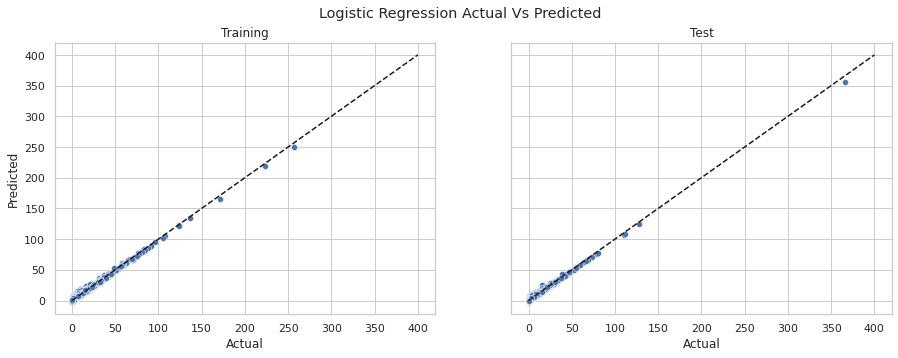

In [ ]:
# Creating multiple subfigures
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True) #Setting up a subfigure
fig.suptitle('Logistic Regression Actual Vs Predicted')
sns.set(style="whitegrid")

# Training Plot
sns.scatterplot(ax=axes[0], 
            x= y_rgr_base_train, 
            y= rgr_base_train_preds)

# Testing Plot
sns.scatterplot(ax=axes[1],
                x=y_rgr_base_test,
                y=rgr_base_test_preds)

# Titles
axes[0].set_title('Training')
axes[1].set_title('Test')

# xlabels
axes[0].set_xlabel('Actual')
axes[1].set_xlabel('Actual')

# ylabels
axes[0].set_ylabel('Predicted')
axes[1].set_ylabel('Predicted')

# 45 degree line (Fit Lines)
axes[0].plot([0, 400], [0, 400], '--k')
axes[1].plot([0, 400], [0, 400], '--k') 

plt.show()

### Hyperparameter Tuned Model

In [ ]:
cor = df_rgr.corr()
cor_target = abs(cor['Elec Station Count'])
relevant_features = cor_target[cor_target>0.3]
relevant_features

Elec Station Count    1.000000
EV Connector Types    0.991841
y-2016                0.318487
aggregate             0.314613
Poverty Estimate      0.319910
Name: Elec Station Count, dtype: float64

In [ ]:
# Seperating the predictor variables and the target variable
X_rgr_hp = df_rgr[['EV Connector Types', 'y-2016', 'aggregate', 'Poverty Estimate']]
y_rgr_hp = df_rgr['Elec Station Count']

In [ ]:
# Splitting into train and test set
X_rgr_hp_train, X_rgr_hp_test, y_rgr_hp_train, y_rgr_hp_test, X_rgr_hp_train_meta, X_rgr_hp_test_meta = train_test_split(X_rgr_hp, y_rgr_hp, df_metadata, 
                                                    train_size=0.8, 
                                                    random_state=7)

In [ ]:
# Spot checking algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [ ]:
# Test options and evaluation metric
num_folds = 10 # for 10-fold CV
seed = 7 # for reproducibility
scoring = 'neg_mean_squared_error'

# evaluate each model in turn
results = []
names = []
for name, model in models:
  # this makes an INDEX (between 1 and 10)
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  
  # save the val results from X train 
	cv_results = cross_val_score(model, X_rgr_hp_train, y_rgr_hp_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: -0.496169 (0.044730)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.127e+04, tolerance: 7.179e+01

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.675e+04, tolerance: 7.294e+01

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.897e+04, tolerance: 7.454e+01

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent

LASSO: -0.535293 (0.081772)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.815e+04, tolerance: 7.294e+01

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.771e+04, tolerance: 7.454e+01

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.803e+04, tolerance: 7.031e+01

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent

EN: -0.532857 (0.079710)
KNN: -31.530559 (11.250039)
CART: -1.682530 (2.107297)
SVR: -29.033090 (11.837598)


Here we can see that Linear Regression is performing the best and KNN is performing the worst. As Linear Regression is performing very well with default parameters itself lets build a pipeline with ElasticNet and Random Forest.

In [ ]:
# Constructing pipeline

pipe_rgr_en = Pipeline([('scl', StandardScaler()),
			('clf', ElasticNet(random_state=42))])

pipe_rgr_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestRegressor(random_state=42))])

In [ ]:
# Setting grid search params

grid_params_rgr_en = [{'clf__fit_intercept': [True, False],
                       'clf__max_iter': [1000, 2000, 5000],
                       'clf__selection': ['cyclic', 'random']}]

grid_params_rgr_rf = [{'clf__min_samples_leaf': [5, 10],
                       'clf__max_depth': [3, 5, 10],
                       'clf__min_samples_split': [5, 10]}]

In [ ]:
# Constructing grid searches

gs_rgr_en = GridSearchCV(estimator=pipe_rgr_en,
    param_grid=grid_params_rgr_en,
    scoring='neg_median_absolute_error',
    cv=10)

gs_rgr_rf = GridSearchCV(estimator=pipe_rgr_rf,
    param_grid=grid_params_rgr_rf,
    scoring='neg_median_absolute_error',
    cv=10)

# List of pipelines for ease of iteration
grids_rgr = [gs_rgr_en, gs_rgr_rf]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict_rgr = {0: 'EN',
                 1: 'RFR'}

In [ ]:
# Fit the grid search objects
print('Performing model optimizations...')
best_err = np.inf
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids_rgr):
	print('\nEstimator: %s' % grid_dict_rgr[idx])	
	# Fit grid search	
	gs.fit(X_rgr_hp_train, y_rgr_hp_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data error
	print('Best training error: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_rgr_hp_pred = gs.predict(X_rgr_hp_test)
	# Test data error of model with best params
	print('Test set error score for best params: %.3f ' % median_absolute_error(y_rgr_hp_test, y_rgr_hp_pred))
	# Track best (lowest test error) model
	if median_absolute_error(y_rgr_hp_test, y_rgr_hp_pred) < best_err:
		best_err = median_absolute_error(y_rgr_hp_test, y_rgr_hp_pred)
		best_gs = gs
		best_clf = idx
print('\nModel with best test set error: %s' % grid_dict_rgr[best_clf])

Performing model optimizations...

Estimator: EN
Best params: {'clf__fit_intercept': True, 'clf__max_iter': 1000, 'clf__selection': 'random'}
Best training error: -0.401
Test set error score for best params: 0.401 

Estimator: RFR
Best params: {'clf__max_depth': 5, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 5}
Best training error: 0.000
Test set error score for best params: 0.000 

Model with best test set error: RFR


In [ ]:
# Converting variables to numpy arrays
X_rgr_hp_train = np.array(X_rgr_hp_train)
X_rgr_hp_test = np.array(X_rgr_hp_test)
y_rgr_hp_train = np.array(y_rgr_hp_train)
y_rgr_hp_test = np.array(y_rgr_hp_test)

In [ ]:
# Scaling the data to avoid data leakage
scaler = StandardScaler()
X_rgr_hp_train = scaler.fit_transform(X_rgr_hp_train)
X_rgr_hp_test = scaler.transform(X_rgr_hp_test)

In [ ]:
# storing the model in a variable
HP2 = RandomForestRegressor(max_depth = 5, min_samples_leaf = 5, min_samples_split = 5)
# fitting the model
HP2 = HP2.fit(X_rgr_hp_train, y_rgr_hp_train)

In [ ]:
# storing the predictions
rgr_hp_train_preds = HP2.predict(X_rgr_hp_train)
rgr_hp_test_preds = HP2.predict(X_rgr_hp_test)

#### Error Metrics

In [ ]:
# R2 score
print("This is train R2:", r2_score(y_rgr_hp_train, rgr_hp_train_preds)) # train
print("This is test R2:", r2_score(y_rgr_hp_test, rgr_hp_test_preds)) # test

This is train R2: 0.9612219380036533
This is test R2: 0.847938277655364


In [ ]:
# Mean Absolute Error
rgr_hp_trainMAE = mean_absolute_error(y_rgr_hp_train, rgr_hp_train_preds)
print("This is trainMAE:", rgr_hp_trainMAE) # train
rgr_hp_testMAE = mean_absolute_error(y_rgr_hp_test, rgr_hp_test_preds)
print("This is testMAE:", rgr_hp_testMAE) # test

This is trainMAE: 0.30056798359292064
This is testMAE: 0.33705321993591286


In [ ]:
# Mean Squared Error
rgr_hp_trainMSE = mean_squared_error(y_rgr_hp_train, rgr_hp_train_preds)
print("This is trainMSE:", rgr_hp_trainMSE) # train
rgr_hp_testMSE = mean_squared_error(y_rgr_hp_test, rgr_hp_test_preds)
print("This is testMSE:", rgr_hp_testMSE) # test

This is trainMSE: 1.1893244213924645
This is testMSE: 7.829319640852478


In [ ]:
# Mean Absolute Percentage Error
rgr_hp_trainMAPE = mean_absolute_percentage_error(y_rgr_hp_train, rgr_hp_train_preds)
print("This is trainMAPE:", rgr_hp_trainMAPE) # train
rgr_hp_testMAPE = mean_absolute_percentage_error(y_rgr_hp_test, rgr_hp_test_preds)
print("This is testMAPE:", rgr_hp_testMAPE) # test

This is trainMAPE: 260637847441479.25
This is testMAPE: 249334096145889.66


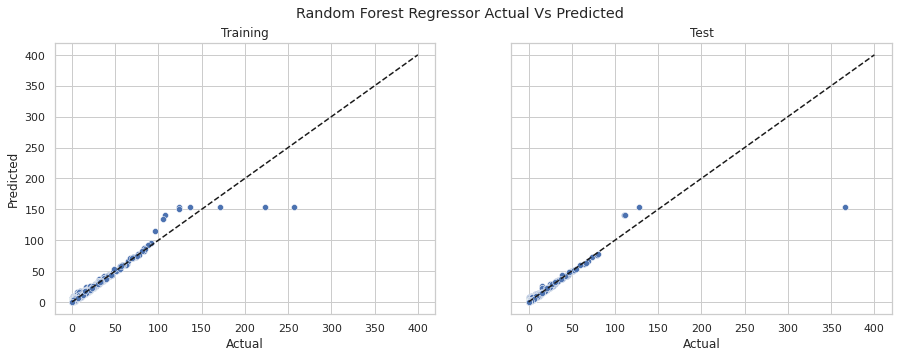

In [ ]:
# Creating multiple subfigures
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True) #Setting up a subfigure
fig.suptitle('Random Forest Regressor Actual Vs Predicted')
sns.set(style="whitegrid")

# Training Plot
sns.scatterplot(ax=axes[0], 
            x= y_rgr_hp_train, 
            y= rgr_hp_train_preds)

# Testing Plot
sns.scatterplot(ax=axes[1],
                x=y_rgr_hp_test,
                y=rgr_hp_test_preds)

# Titles
axes[0].set_title('Training')
axes[1].set_title('Test')

# xlabels
axes[0].set_xlabel('Actual')
axes[1].set_xlabel('Actual')

# ylabels
axes[0].set_ylabel('Predicted')
axes[1].set_ylabel('Predicted')

# 45 degree line (Fit Lines)
axes[0].plot([0, 400], [0, 400], '--k')
axes[1].plot([0, 400], [0, 400], '--k')

plt.show()

### Auto Machine Learning Model

In [ ]:
df_rgr_copy = df_rgr.copy()

In [ ]:
df_rgr_copy = df_rgr_copy.sample(frac=0.2, random_state=1)

In [ ]:
df_rgr_copy.shape

(6380, 18)

In [ ]:
# Seperating the predictor variables and the target variable
X_rgr_auto = df_rgr_copy.drop(columns=['Elec Station Count'])
y_rgr_auto = df_rgr_copy['Elec Station Count']

In [ ]:
# Splitting the data into train and test
X_rgr_auto_train, X_rgr_auto_test, y_rgr_auto_train, y_rgr_auto_test = train_test_split(X_rgr_auto, y_rgr_auto, train_size=0.8, random_state=7)

In [ ]:
from tpot import TPOTRegressor

# Construct and fit TPOT classifier
start_time = time.time()
tpot = TPOTRegressor(generations=1, verbosity=2, scoring='neg_mean_absolute_error')
tpot.fit(X_rgr_auto_train, y_rgr_auto_train)
end_time = time.time()

# Results
print('TPOT regressor finished in %s seconds' % (end_time - start_time)) 
print('Best pipeline test neg(MAE): %.3f' % tpot.score(X_rgr_auto_test, y_rgr_auto_test))

# Save best pipeline as Python script file
tpot.export('tpot_Regressor_pipeline.py')

Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.23889779973485595

Best pipeline: DecisionTreeRegressor(input_matrix, max_depth=8, min_samples_leaf=1, min_samples_split=8)
TPOT regressor finished in 668.5426154136658 seconds
Best pipeline test neg(MAE): -0.190


In [ ]:
# This is the code copied from the topt_Regressor_pipeline.py
tpot_data = df_rgr_copy
features = tpot_data.drop('Elec Station Count', axis=1)
training_features2, testing_features2, training_target2, testing_target2 = \
            train_test_split(features, tpot_data['Elec Station Count'], random_state=None)

# Average CV score on the training set was: -0.23889779973485595
exported_pipeline = DecisionTreeRegressor(max_depth=8, min_samples_leaf=1, min_samples_split=8)

exported_pipeline.fit(training_features2, training_target2)
results_train2 = exported_pipeline.predict(training_features2)
results_test2 = exported_pipeline.predict(testing_features2)

# Evaluating the results
mean_absolute_error(testing_target2, results_test2)

0.29740770687741636

#### Error Metrics

In [ ]:
# R2 score
print("This is train R2:", r2_score(training_target2, results_train2)) # train
print("This is test R2:", r2_score(testing_target2, results_test2)) # test

This is train R2: 0.9878348499278413
This is test R2: 0.9524338368501628


In [ ]:
# Mean Absolute Error
rgr_auto_trainMAE = mean_absolute_error(training_target2, results_train2)
print("This is trainMAE:", rgr_auto_trainMAE) # train
rgr_auto_testMAE = mean_absolute_error(testing_target2, results_test2)
print("This is testMAE:", rgr_auto_testMAE) # test

This is trainMAE: 0.14339069196654305
This is testMAE: 0.29740770687741636


In [ ]:
# Mean Squared Error
rgr_auto_trainMSE = mean_squared_error(training_target2, results_train2)
print("This is trainMSE:", rgr_auto_trainMSE) # train
rgr_auto_testMSE = mean_squared_error(testing_target2, results_test2)
print("This is testMSE:", rgr_auto_testMSE) # test

This is trainMSE: 0.2610817483132117
This is testMSE: 1.4558895805713967


In [ ]:
# Mean Absolute Percentage Error
rgr_auto_trainMAPE = mean_absolute_percentage_error(training_target2, results_train2)
print("This is trainMAPE:", rgr_auto_trainMAPE) # train
rgr_auto_testMAPE = mean_absolute_percentage_error(testing_target2, results_test2)
print("This is testMAPE:", rgr_auto_testMAPE) # test

This is trainMAPE: 0.04446985437965221
This is testMAPE: 11294293736352.416


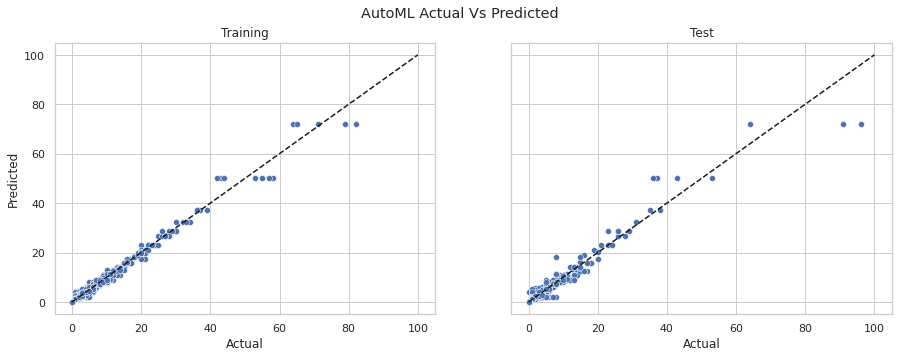

In [ ]:
# Creating multiple subfigures
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True) #Setting up a subfigure
fig.suptitle('AutoML Actual Vs Predicted')
sns.set(style="whitegrid")

# Training Plot
sns.scatterplot(ax=axes[0], 
            x= training_target2, 
            y= results_train2)

# Testing Plot
sns.scatterplot(ax=axes[1],
                x=testing_target2,
                y=results_test2)

# Titles
axes[0].set_title('Training')
axes[1].set_title('Test')

# xlabels
axes[0].set_xlabel('Actual')
axes[1].set_xlabel('Actual')

# ylabels
axes[0].set_ylabel('Predicted')
axes[1].set_ylabel('Predicted')

# 45 degree line (Fit Lines)
axes[0].plot([0, 100], [0, 100], '--k')
axes[1].plot([0, 100], [0, 100], '--k') 

plt.show()

# Interpretability:

## Permutation Feature Importance

### Classification

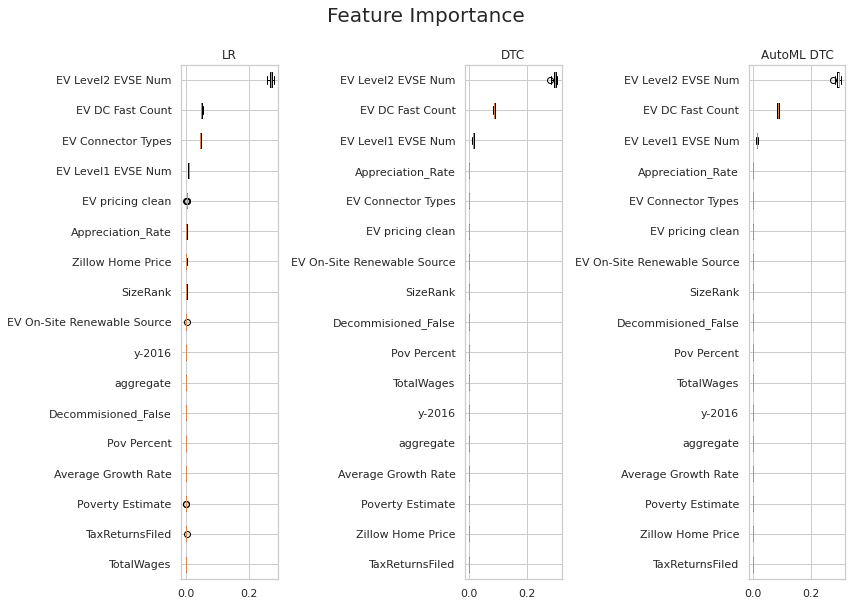

In [ ]:
# plot basics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8)) # 1 row, 3 columns
plt.suptitle('Feature Importance', y= 1.05, size = 20)
# LR
LR = LogisticRegression()
LR.fit(X_cls_auto_train, y_cls_auto_train)
clf = LR
result = permutation_importance(clf, X_cls_auto_test, y_cls_auto_test, n_repeats=10,
                                random_state=7)
perm_sorted_idx = result.importances_mean.argsort()
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_cls_base.columns[perm_sorted_idx])
ax1.set_title('LR')

# DTC
HP1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 5, min_samples_split = 5)
HP1.fit(X_cls_auto_train, y_cls_auto_train)
clf = HP1
result = permutation_importance(clf, X_cls_auto_test, y_cls_auto_test, n_repeats=10,
                                random_state=7)
perm_sorted_idx = result.importances_mean.argsort()

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_cls_base.columns[perm_sorted_idx])
ax2.set_title('DTC')

# AutoML
exported_pipeline = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_leaf=17, min_samples_split=4)
exported_pipeline.fit(X_cls_auto_train, y_cls_auto_train)
clf = exported_pipeline
result = permutation_importance(clf, X_cls_auto_test, y_cls_auto_test, n_repeats=10,
                                random_state=7)
perm_sorted_idx = result.importances_mean.argsort()

ax3.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_cls_base.columns[perm_sorted_idx])
ax3.set_title('AutoML DTC')

fig.tight_layout()
plt.show()

The Three most significant varibles acrross each model are: EV Level2 EVSE Num, EV DC Fast Count, and EV Level1 EVSE Num. When the rows in these varibles are shuffled indepenetly there is the largest reduction of accuracy making them the most signifcant varibles in the model.

It appares that the importance of the remaining varibles are relativly constant and dont have that much, if any affect on the accuracy value, however the sqaure is ordered by spread of accuracy so the remaining 7 varibles per model are:

**LR:**

EV Level1 ESVE Num

EV Pricing Clean

Apperication_Rate

Zillow Home Price

SizeRank EV onsite Renewable Source

y-2016

Aggregation


**DTC**

Apperication_Rate

EV Connector Types

EV Pricing Clean

SizeRank EV onsite Renewable Source

SizeRank

Decommisioned_False

Pov Percent


**AutoML DTC**

Apperication_Rate

EV Connector Types

EV Pricing Clean

SizeRank EV onsite Renewable Source

SizeRank

Decommisioned_False

Pov Percent

It appears that the DTC and AutoDTC have the same varibles as the most signifcant and it's interesting that their least important varibles are the LR's most signifcant ones.

### Regression

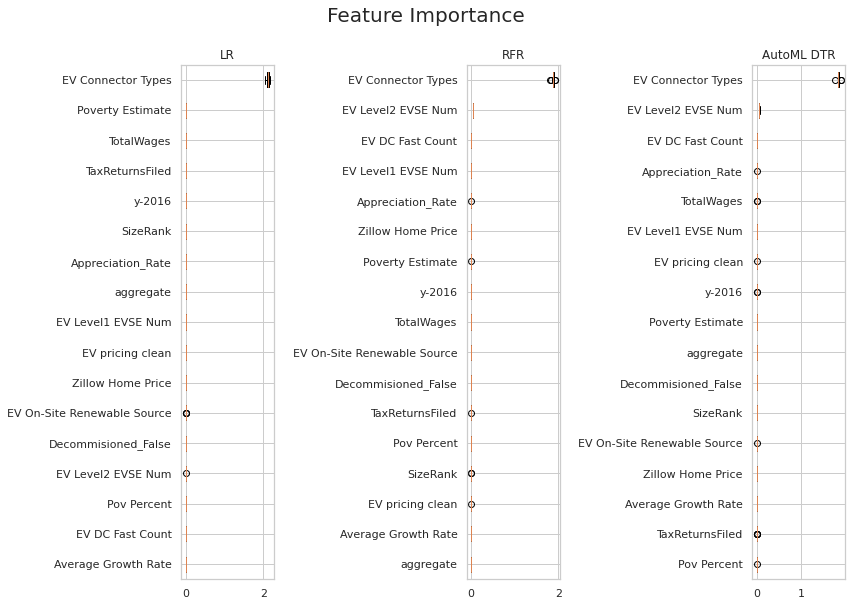

In [ ]:
# plot basics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8)) # 1 row, 3 columns
plt.suptitle('Feature Importance', y= 1.05, size = 20)
# LR
LR2 = LinearRegression()
LR2.fit(X_rgr_auto_train, y_rgr_auto_train)
clf = LR2
result = permutation_importance(clf, X_rgr_auto_test, y_rgr_auto_test, n_repeats=10,
                                random_state=7)
perm_sorted_idx = result.importances_mean.argsort()
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_rgr_base.columns[perm_sorted_idx])
ax1.set_title('LR')

# RFR
HP2 = RandomForestRegressor(max_depth = 5, min_samples_leaf = 5, min_samples_split = 5)
HP2.fit(X_rgr_auto_train, y_rgr_auto_train)
clf = HP2
result = permutation_importance(clf, X_rgr_auto_test, y_rgr_auto_test, n_repeats=10,
                                random_state=7)
perm_sorted_idx = result.importances_mean.argsort()

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_rgr_base.columns[perm_sorted_idx])
ax2.set_title('RFR')

# AutoML
exported_pipeline = DecisionTreeRegressor(max_depth=8, min_samples_leaf=1, min_samples_split=8)
exported_pipeline.fit(X_rgr_auto_train, y_rgr_auto_train)
clf = exported_pipeline
result = permutation_importance(clf, X_rgr_auto_test, y_rgr_auto_test, n_repeats=10,
                                random_state=7)
perm_sorted_idx = result.importances_mean.argsort()

ax3.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_rgr_base.columns[perm_sorted_idx])
ax3.set_title('AutoML DTR')

fig.tight_layout()
plt.show()

Clearly the EV Connector Types varible is the most signifcant in each model having the largest spread of accuracy affected by shuffling the values of this varible and keeping all other values of a given row the same.

The nine next most important varibles are subjective shown though the circles indicating there is some spread, but not a significant variation.

**LR:**

EV Onsite-Renewable Source

EV Level 2 EVSE Num

Then the rest of the varibles seem to be equally unimportant so we will chose the next seven in order of the graph

TotalWages

TaxReturnsFiled

y-2016

SizeRank

Apperication_Rank

Aggregate

EV Level1 EVSE Num

**RFR**

Varibles with some spread of Accuracy reduction:

Apperication_Rate

Poverty Estimate

TaxReturnsFiled

SizeRank

EV Pricing Clean

The next 3 varibles hold little to no importance but will be taken in order of
the graph

EV Level2 EWVSE Num

EV DC Fast Count

EV LEvel1  EVSE Num

**AutoML RFR DTR**

Apperication_Rate

TotalWages

EV Pricing Clean

y-2016

EV On-Site Renewable Source

TaxReturnsFiled

Pov Percent

EV Level2 EVSE Num

the following two varibles have little to no effect on acuurcay but will be taken in order of the graph

EV DC Fast Count

EV Level1 EVSE Num


We find it especailly interesting that the most significant varible for the regression models (EV Connector Types) is not noticably signifcant in any of the classifcation models.


## Partial Dependence

### Classification

In [ ]:
# Creating a copy to not mess up the main dataframe
df_cls_pd = df_cls.copy()

In [ ]:
# Sampling the data as the file is crashing if the size is too much
df_cls_pd = df_cls_pd.sample(frac=0.05, random_state=1)

In [ ]:
# Checking the shape after sampling
df_cls_pd.shape

(1595, 18)

In [ ]:
# Seperating the predictor variables and the target variable
X_cls_pd = df_cls_pd.drop(columns=['ElecZip'])
y_cls_pd = df_cls_pd['ElecZip']

In [ ]:
# Splitting the data into train and test
X_cls_pd_train, X_cls_pd_test, y_cls_pd_train, y_cls_pd_test = train_test_split(X_cls_pd, y_cls_pd, train_size=0.8, random_state=7)

In [ ]:
# checking the info
X_cls_pd_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 10319 to 4883
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EV Level1 EVSE Num           1276 non-null   float64
 1   EV Level2 EVSE Num           1276 non-null   float64
 2   EV DC Fast Count             1276 non-null   float64
 3   EV Connector Types           1276 non-null   float64
 4   EV pricing clean             1276 non-null   float64
 5   EV On-Site Renewable Source  1276 non-null   float64
 6   SizeRank                     1276 non-null   float64
 7   Appreciation_Rate            1276 non-null   float64
 8   TaxReturnsFiled              1276 non-null   float64
 9   TotalWages                   1276 non-null   float64
 10  y-2016                       1276 non-null   float64
 11  aggregate                    1276 non-null   float64
 12  Average Growth Rate          1276 non-null   float64
 13  Poverty Estima

In [ ]:
# Storing the top 10 variable in each model in a seperate variable
top10_lr = X_cls_pd_train[['EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Connector Types', 'EV Level1 EVSE Num', 'EV pricing clean',
                           'Appreciation_Rate', 'Zillow Home Price', 'SizeRank', 'EV On-Site Renewable Source', 'y-2016']]

top10_hp = X_cls_pd_train[['EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Level1 EVSE Num', 'Appreciation_Rate', 'EV Connector Types',
                           'EV pricing clean', 'EV On-Site Renewable Source', 'SizeRank', 'Decommisioned_False', 'Pov Percent']]

top10_auto = X_cls_pd_train[['EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Level1 EVSE Num', 'Appreciation_Rate', 'EV Connector Types',
                           'EV pricing clean', 'EV On-Site Renewable Source', 'SizeRank', 'Decommisioned_False', 'Pov Percent']]

In [ ]:
def plot_ice_grid(dict_of_ice_dfs, data_df, features, ax_ylabel='', nrows=2, 
                  ncols=5, figsize=(24, 14), sharex=False, sharey=True,
                  num_grid_points = 10, subplots_kws={}, rug_kws={'color':'k'}, **ice_plot_kws):
    """A function that plots ICE plots for different features in a grid."""
    fig, axes = plt.subplots(nrows=nrows, 
                             ncols=ncols, 
                             figsize=figsize,
                             sharex=sharex,
                             sharey=sharey,
                             **subplots_kws)
    # for each feature plot the ice curves and add a rug at the bottom of the 
    # subplot
    for f, ax in zip(features, axes.flatten()):
        ice_plot(dict_of_ice_dfs[f], ax=ax, **ice_plot_kws)
        # add the rug
        sns.distplot(data_df[f], ax=ax, hist=False, kde=False, 
                     rug=True, rug_kws=rug_kws)
        ax.set_title('feature = ' + f)
        ax.set_ylabel(ax_ylabel)
        sns.despine()
        
    # getting rid of the blank plots
    for i in range(len(features), nrows*ncols):
        axes.flatten()[i].axis('off')

    return fig

#### Logistic Regression

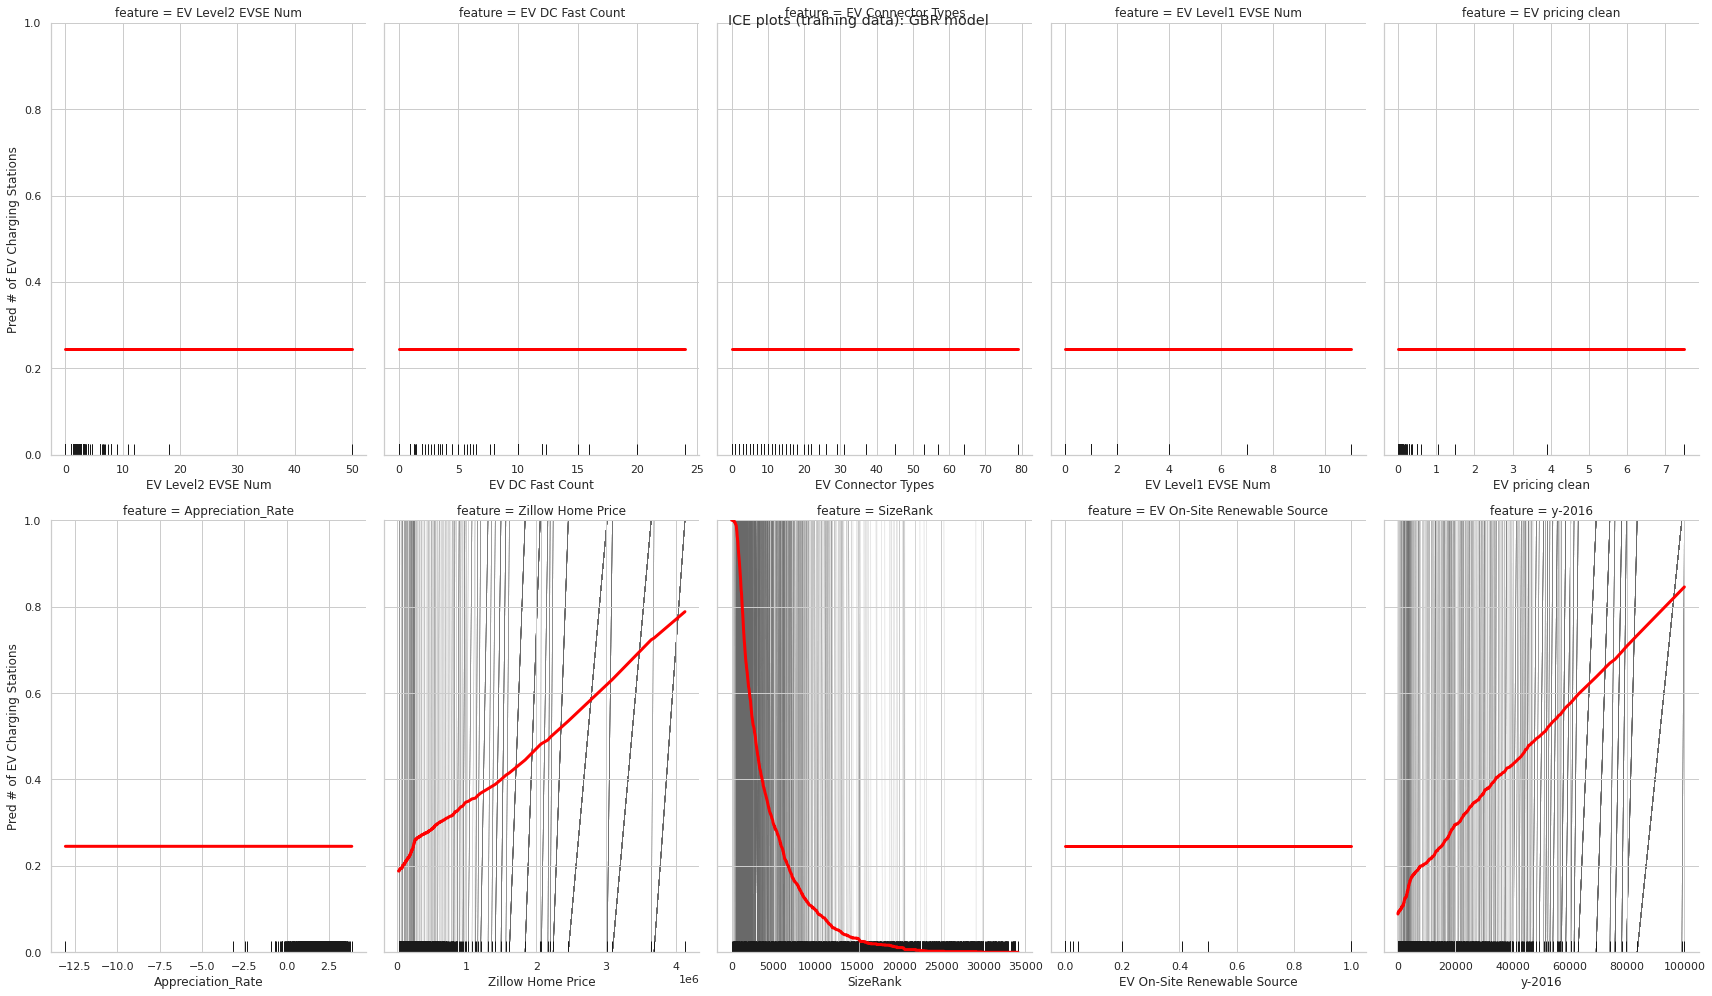

In [ ]:
# columns to plot
features = top10_lr.columns
model_lr = LogisticRegression()
model_lr.fit(top10_lr, y_cls_pd_train)
# creating dictionary of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=top10_lr, column=feat, predict=model_lr.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, top10_lr, features,
                    ax_ylabel='Pred # of EV Charging Stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,1]) # setting y limits
plt.suptitle('ICE plots (training data): GBR model')
plt.tight_layout()

The Logistic Regress model Treats:

 Zillow Home Price as a Positive linear relationship 
 
 Size rank a negatively expontial growth varible

 y-2016 as a linear relationship.

 The remaining varibles are flatlines meaning there is little or no relationships. Its important to not that the carpets for these varibles show vary little spread which may be a factor.

#### Hyperparameter (Decision Tree Classifier)

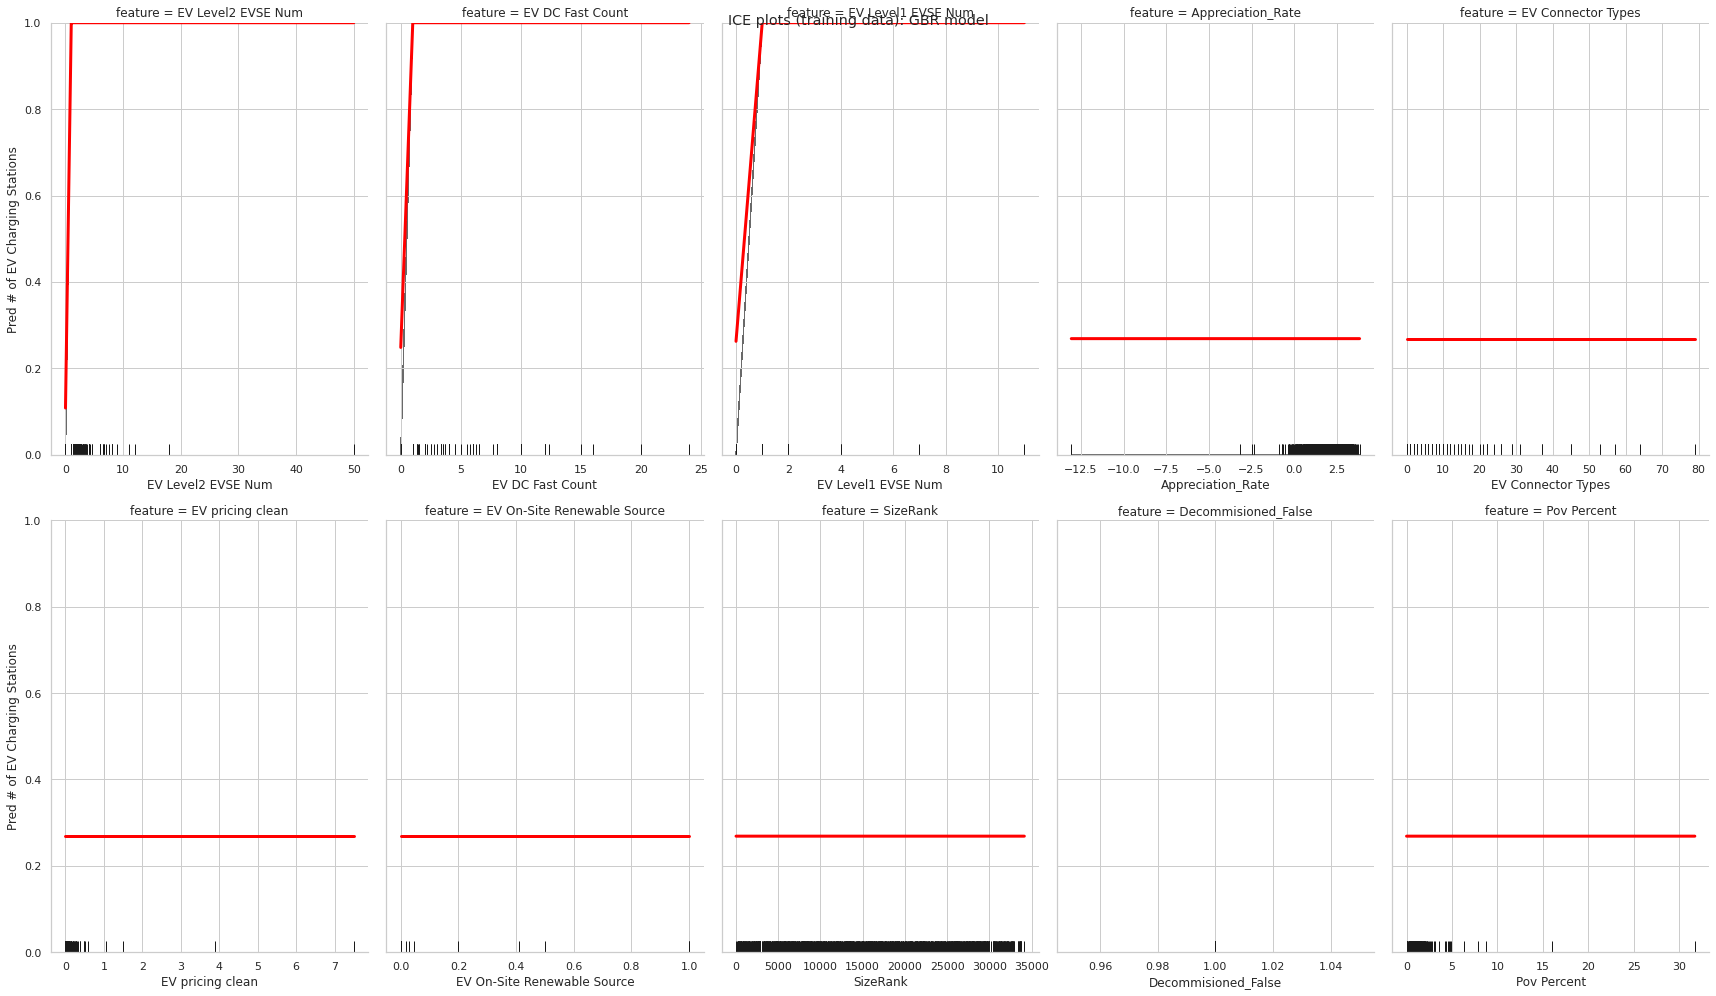

In [ ]:
# columns to plot
features = top10_hp.columns
model_hp = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 5, min_samples_split = 5)
model_hp.fit(top10_hp, y_cls_pd_train)
# creating dictionary of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=top10_hp, column=feat, predict=model_hp.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, top10_hp, features,
                    ax_ylabel='Pred # of EV Charging Stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,1]) # setting y limits
plt.suptitle('ICE plots (training data): GBR model')
plt.tight_layout()

The Decision Tree Classifier Model Treats EV level2 EVSE Num, EV DC Fast Count Level1 ESVE Num as an incredibly strong linear realtionship that then flatlines. This means that the gorwth from 0 to a small amount of ports are most signifcant to these varibles and the model as a whole. The remaining varibles have little to no effect on the model since the model does not treat the relationship. 

#### AutoML (Decision Tree Classifier)

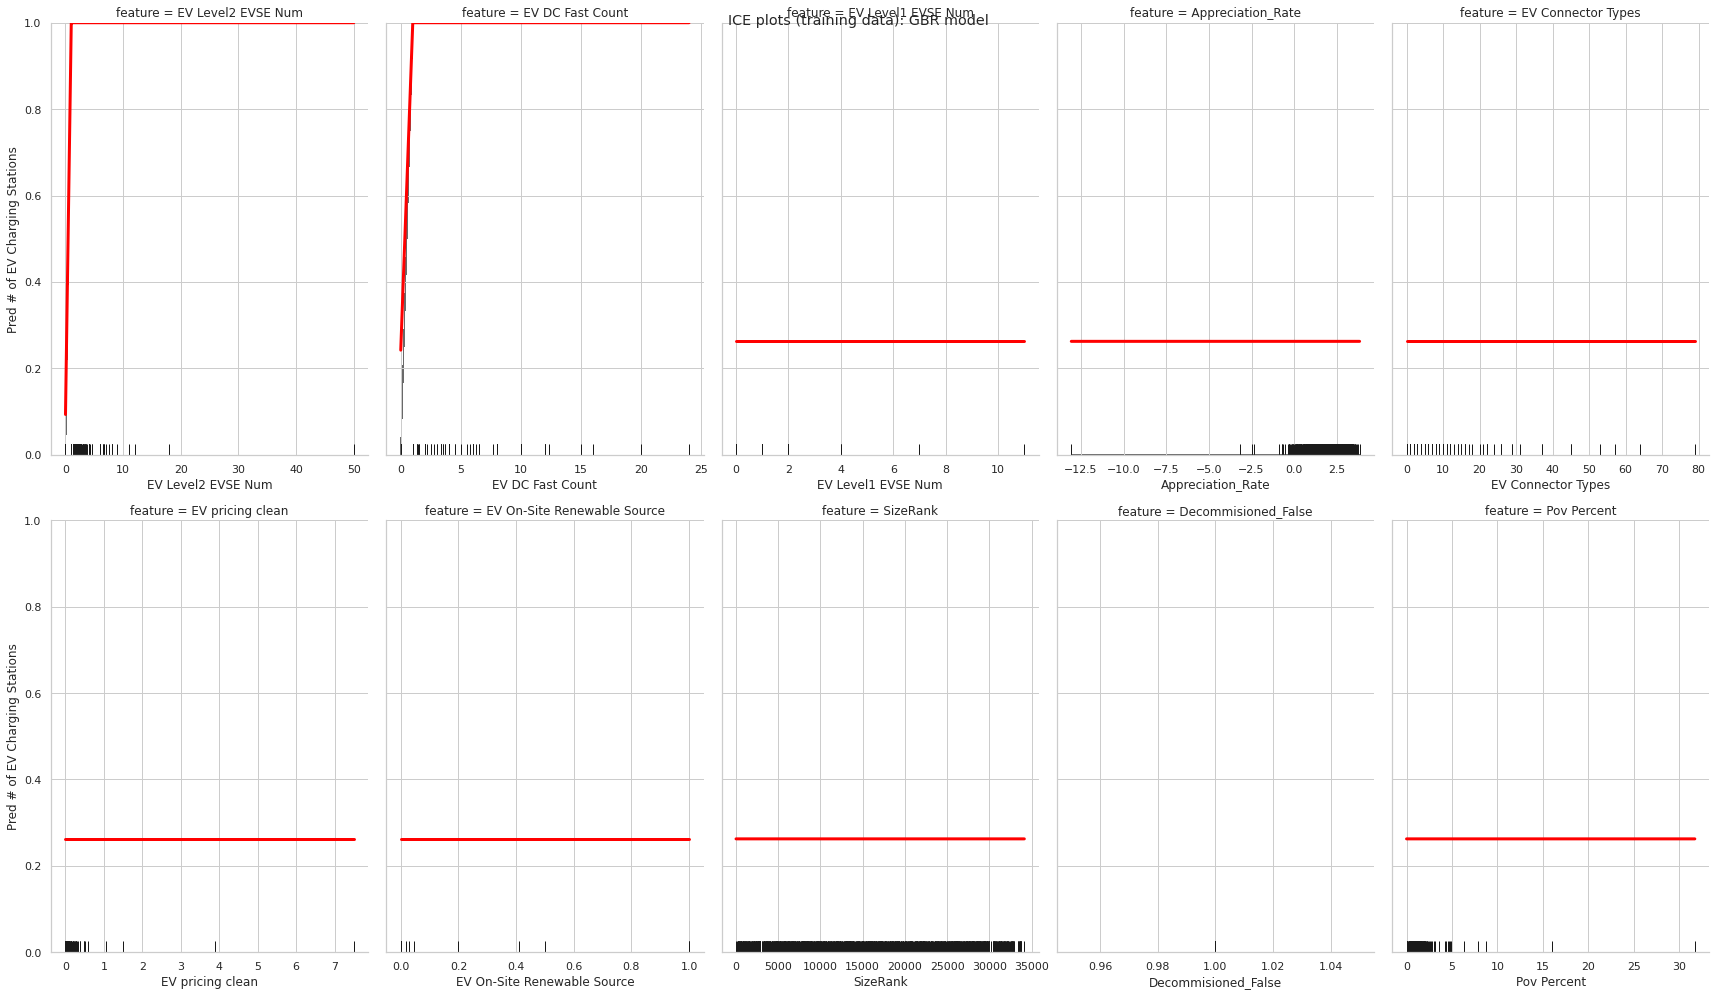

In [ ]:
# columns to plot
features = top10_auto.columns
model_auto = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_leaf=17, min_samples_split=4)
model_auto.fit(top10_auto, y_cls_pd_train)
# creating dictionary of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=top10_auto, column=feat, predict=model_auto.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, top10_auto, features,
                    ax_ylabel='Pred # of EV Charging Stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,1]) # setting y limits
plt.suptitle('ICE plots (training data): GBR model')
plt.tight_layout()

The Decision Tree Classifier (Model AutoML) Treats EV level2 EVSE Num, and EV DC Fast Count as an incredibly strong linear realtionship that then flatlines. This means that the gorwth from 0 to a small amount of ports are most signifcant to these varibles and the model as a whole. The remaining varibles have little to no effect on the model since the model does not treat the relationship.

### Regression

In [ ]:
# create a copy to not mess up the main dataframe
df_rgr_pd = df_rgr.copy()

In [ ]:
# sampling the data as too much data is crashing the file
df_rgr_pd = df_rgr_pd.sample(frac=0.05, random_state=1)

In [ ]:
# shape after sampling the file
df_rgr_pd.shape

(1595, 18)

In [ ]:
# Seperating the predictor variables and the target variable
X_rgr_pd = df_rgr_pd.drop(columns=['Elec Station Count'])
y_rgr_pd = df_rgr_pd['Elec Station Count']

In [ ]:
# Splitting the data into train and test
X_rgr_pd_train, X_rgr_pd_test, y_rgr_pd_train, y_rgr_pd_test = train_test_split(X_rgr_pd, y_rgr_pd, train_size=0.8, random_state=7)

In [ ]:
# checking info
X_rgr_pd_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 10319 to 4883
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EV Level1 EVSE Num           1276 non-null   float64
 1   EV Level2 EVSE Num           1276 non-null   float64
 2   EV DC Fast Count             1276 non-null   float64
 3   EV Connector Types           1276 non-null   float64
 4   EV pricing clean             1276 non-null   float64
 5   EV On-Site Renewable Source  1276 non-null   float64
 6   SizeRank                     1276 non-null   float64
 7   Appreciation_Rate            1276 non-null   float64
 8   TaxReturnsFiled              1276 non-null   float64
 9   TotalWages                   1276 non-null   float64
 10  y-2016                       1276 non-null   float64
 11  aggregate                    1276 non-null   float64
 12  Average Growth Rate          1276 non-null   float64
 13  Poverty Estima

In [ ]:
# Storing the top 10 variable in each model in a seperate variable
top10_lr2 = X_rgr_pd_train[['EV Connector Types', 'Poverty Estimate', 'TotalWages', 'TaxReturnsFiled', 'y-2016',
                           'SizeRank', 'Appreciation_Rate', 'aggregate', 'EV Level1 EVSE Num', 'EV pricing clean']]

top10_hp2 = X_rgr_pd_train[['EV Connector Types', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Level1 EVSE Num', 'Appreciation_Rate',
                           'Zillow Home Price', 'Poverty Estimate', 'y-2016', 'TotalWages', 'EV On-Site Renewable Source']]

top10_auto2 = X_rgr_pd_train[['EV Connector Types', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'Appreciation_Rate', 'TotalWages',
                           'EV Level1 EVSE Num', 'EV pricing clean', 'y-2016', 'Poverty Estimate', 'aggregate']]

In [ ]:
def plot_ice_grid(dict_of_ice_dfs, data_df, features, ax_ylabel='', nrows=2, 
                  ncols=5, figsize=(24, 14), sharex=False, sharey=True,
                  num_grid_points = 10, subplots_kws={}, rug_kws={'color':'k'}, **ice_plot_kws):
    """A function that plots ICE plots for different features in a grid."""
    fig, axes = plt.subplots(nrows=nrows, 
                             ncols=ncols, 
                             figsize=figsize,
                             sharex=sharex,
                             sharey=sharey,
                             **subplots_kws)
    # for each feature plot the ice curves and add a rug at the bottom of the 
    # subplot
    for f, ax in zip(features, axes.flatten()):
        ice_plot(dict_of_ice_dfs[f], ax=ax, **ice_plot_kws)
        # add the rug
        sns.distplot(data_df[f], ax=ax, hist=False, kde=False, 
                     rug=True, rug_kws=rug_kws)
        ax.set_title('feature = ' + f)
        ax.set_ylabel(ax_ylabel)
        sns.despine()
        
    # getting rid of the blank plots
    for i in range(len(features), nrows*ncols):
        axes.flatten()[i].axis('off')

    return fig

#### Linear Regression

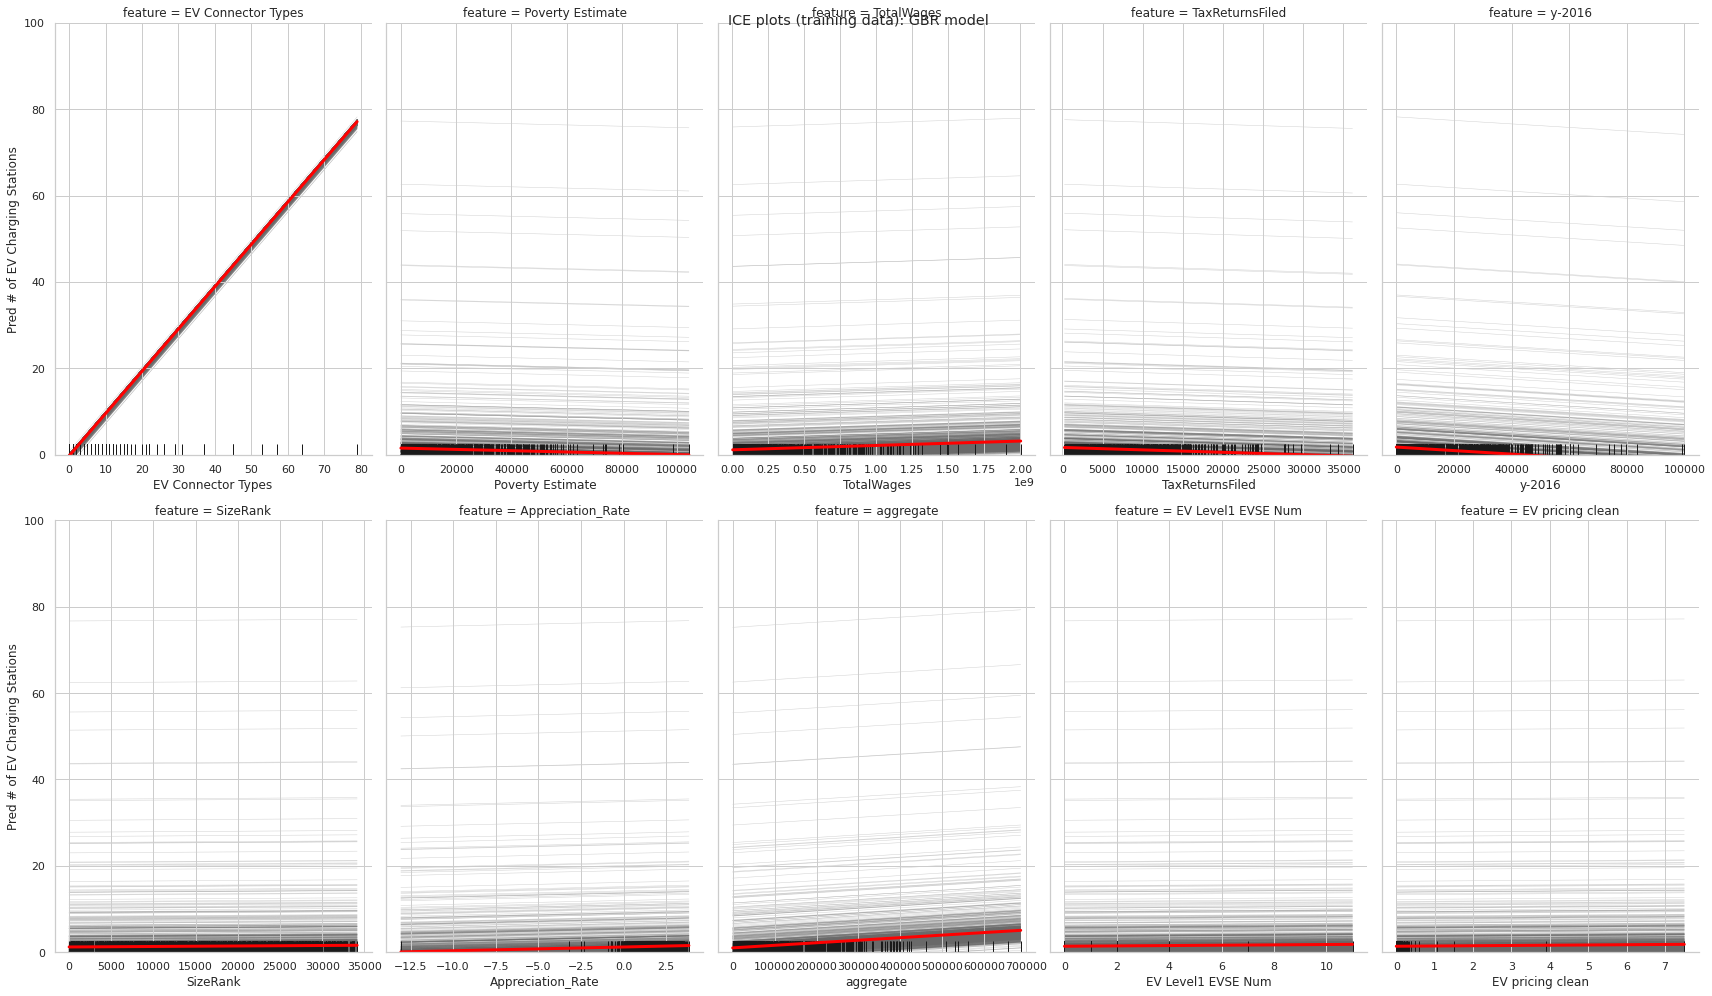

In [ ]:
# columns to plot
features = top10_lr2.columns
model_lr2 = LinearRegression()
model_lr2.fit(top10_lr2, y_rgr_pd_train)
# creating dictionary of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=top10_lr2, column=feat, predict=model_lr2.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, top10_lr2, features,
                    ax_ylabel='Pred # of EV Charging Stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,100]) # setting y limits
plt.suptitle('ICE plots (training data): GBR model')
plt.tight_layout()

The Linear Regression Model Treats EV Connector types as a strong positive linear relationship. (Higher value results in higher count of EV Stations)

It then treates totalwages, and aggregate as having a slightly positive linear relationship and Apperication_Rate.(Higher value results in higher count of EV Stations)

The Model treates Poverty Estimate, TaxReturns Filled, and y-2016 as having a slight negative relationship (Higher values result in lower count of charing stations)

The remaining varibles are flat lines meaning the model does not provide much of a relationship for these varibles on Electric Station Count.

#### Hyperparameter (RandomForest Regressor)

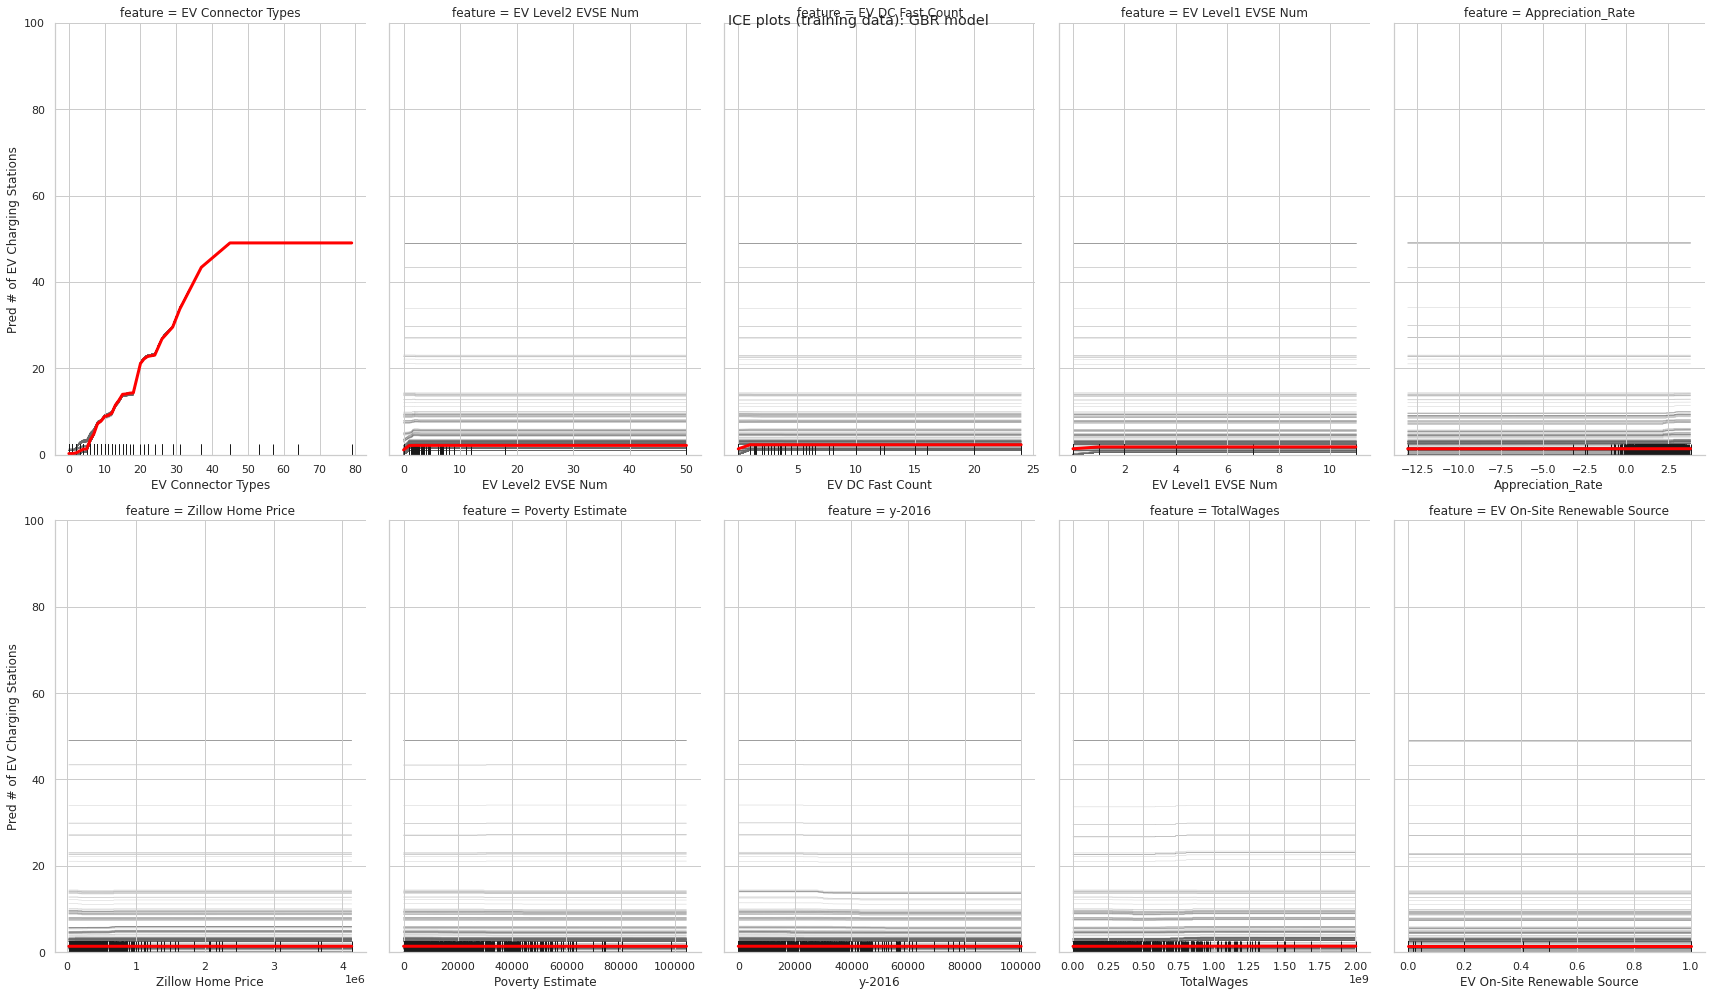

In [ ]:
# columns to plot
features = top10_hp2.columns
model_hp2 = RandomForestRegressor(max_depth = 5, min_samples_leaf = 5, min_samples_split = 5)
model_hp2.fit(top10_hp2, y_rgr_pd_train)
# creating dictionary of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=top10_hp2, column=feat, predict=model_hp2.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, top10_hp2, features,
                    ax_ylabel='Pred # of EV Charging Stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,100]) # setting y limits
plt.suptitle('ICE plots (training data): GBR model')
plt.tight_layout()

The Hyperparametered RandomForest Regressor Shows the only significant varible is the EV Connector Types Varible it has a positive linear relations where Higher values result in a higher predicted count of electric stations, it's interesting to see that the linearity stargers as the varible increase meaning it is not a consitant relationship.

The remaining varibles are flat lines meaning the model does not provide much of a relationship for these varibles on Electric Station Count.

#### AutoML (DecisionTree Regressor)

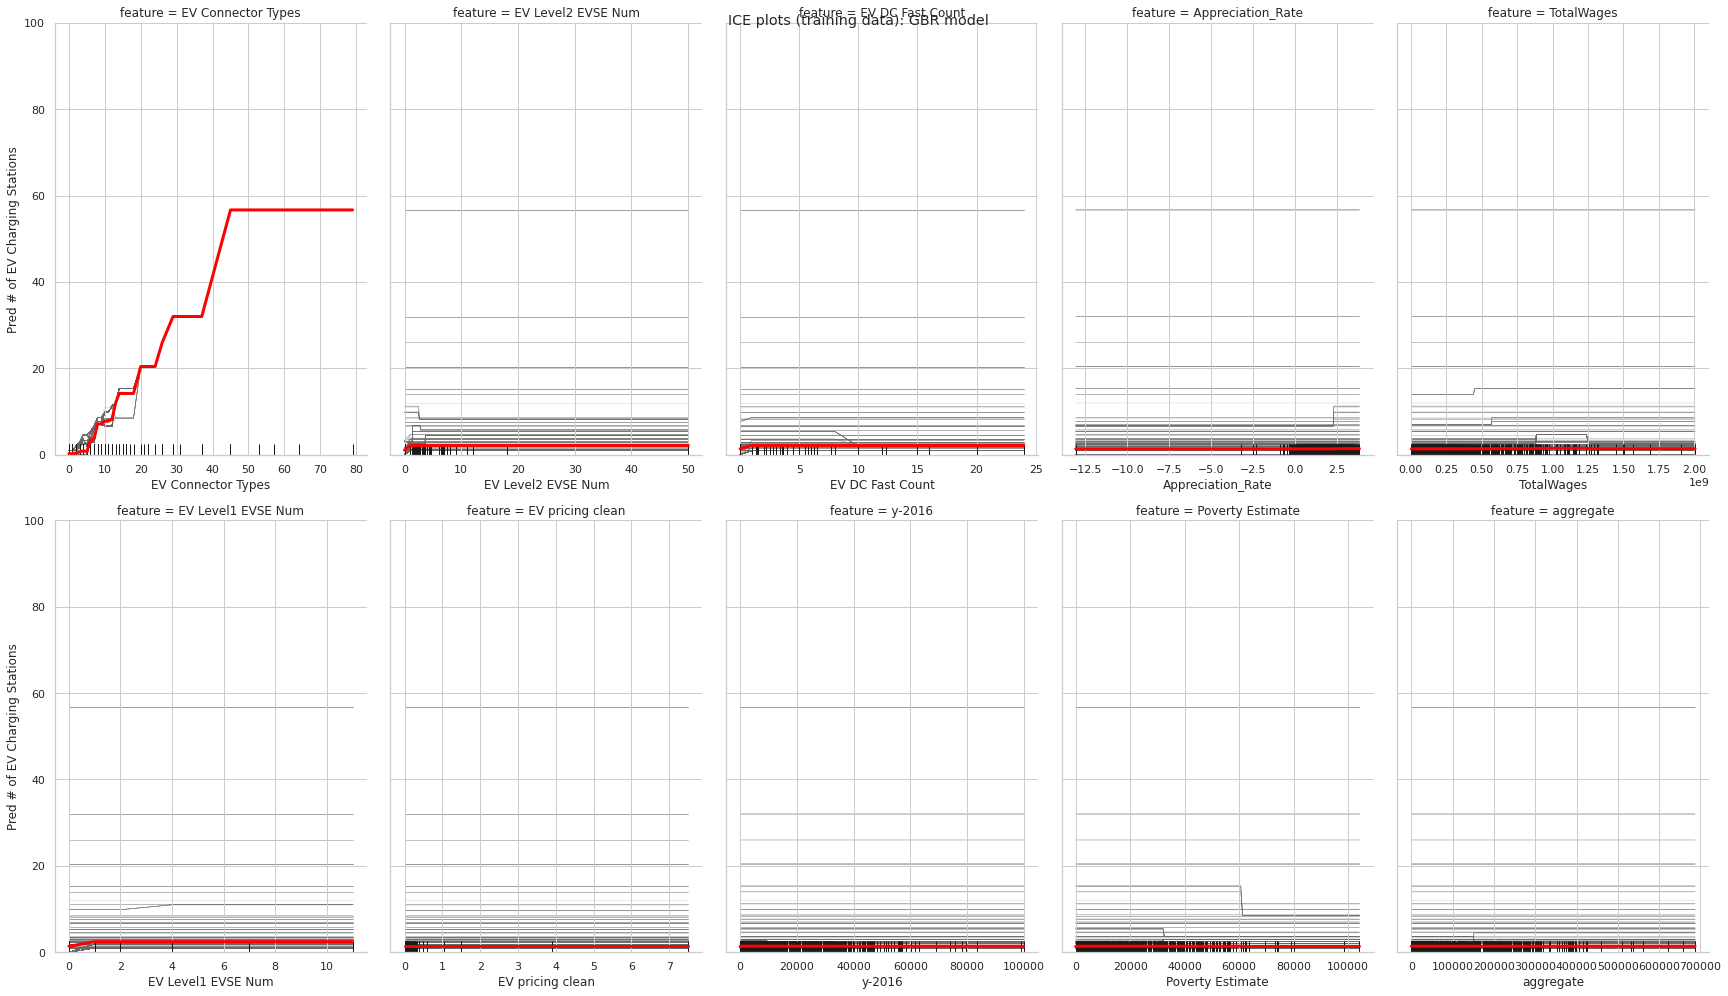

In [ ]:
# columns to plot
features = top10_auto2.columns
model_auto2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=1, min_samples_split=8)
model_auto2.fit(top10_auto2, y_rgr_pd_train)
# creating dictionary of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=top10_auto2, column=feat, predict=model_auto2.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, top10_auto2, features,
                    ax_ylabel='Pred # of EV Charging Stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,100]) # setting y limits
plt.suptitle('ICE plots (training data): GBR model')
plt.tight_layout()

The AutoML Decision Tree Regressor Shows the only significant varible is the EV Connector Types Varible it has a positive linear relations where Higher values result in a higher predicted count of electric stations, it's interesting to see that the linearity stargers as the varible increase meaning it is not a consitant relationship.

The remaining varibles are flat lines meaning the model does not provide much of a relationship for these varibles on Electric Station Count.

## Insights from the Permutation Feature Importance and Partial Dependence


*   While the model types selected different varibles, they have a common trend where the varibles relatining to electric charging station ports are the most significant predictors
*   It's Exteremly interesting that the logistic regression varible had a strong positive relations between if a charging station was in a zipcode, and y-2016 (Our population varible) while, the linear regression model treated this realtionship as a slightly negative relationship.


*   It is also interesting that the negative realtionship between sizerank and the logistic regression varible shows that larger zipcodes are less likely to have any charging stations even though there would be more room for one.
*   The Decision Tree Classifiers show that having any amount of ports are the most signifcant predictor of having charinging stations, which seems logical.


*   We're surprised to see that there is not clear interpration of the model treating charging station price with any relationship. Espeically since other EV Related Varibles seemed to contribute largely to the problem.







# Conclusion




*   Our AutoML Decision Tree Regressor have the tightest Spread of residuals for lower values, meaning it was best at predicting zipcodes with smaller amounts of charging stations, this is important if our business goal is to promte chariging station and EV growth.
*   While we created a variety of Socio-Economic varibles it would be interesting to explore other varibles such as education,  unempolyment, and homelessness in these areas however these varibles are much harder to account for due to under reporting.

*   An interesting use for our classification or Regression models would be in the GPS or Travel industry. The ability to route electric vehicle drivers through zipcodes with high probability of having a charging station, or high amounts of charging stations would be important for long road trips. We also see potential for the development of an application that users can use to update our predictions to successfully map the actual value of these results.

*   Another Business Value would be selling the information to Charging Station Companies, this would provide confident knowledge about which zipcodes need development, which have no development, which have the potential to be the only supplier, and which are no longer an opportunity due to over development of charging stations.
*   Lastly, It'd be interesting to explore the relationship between charging stations and electric vehicles sales/ownership. Are places with more electric vehicles more likely to sale electric vehicles or does the sale of electric vehicles promote the building of charging stations? It'd also be interesting to see how home charging stations come into play, are they too expensive, causing people to wait for charging stations to be built locally before buying their vehicles or is there no effect? It's possible that all of these solutions are intertwined but understanding this behavior would provide valuable insight into a green future. 

